# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [258]:
import pandas as pd

In [268]:
# read data

data = 'Wholesale_Data.csv'

df = pd.read_csv(data)

In [5]:
df.shape

(440, 8)

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We can see that Channel variable contains values as 1 and 2.

These two values classify the customers from two different channels as

 - 1 for Horeca (Hotel/Retail/Café) customers and
 - 2 for Retail channel (nominal) customers.

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Number of values close to 0 in each column:
Channel             440
Region              440
Fresh                 3
Milk                  0
Grocery               1
Frozen                0
Detergents_Paper      5
Delicassen            6
dtype: int64


 - only int64 data, and all non-null
 - two cat columns, the rest are numerical 

# simple feature engineering 

In [269]:
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

<Axes: >

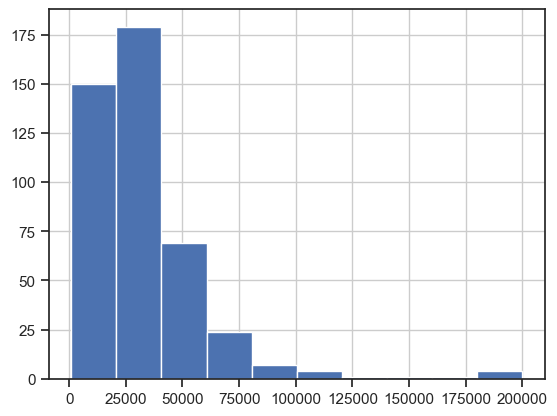

In [270]:
df['Total_Spend'].hist()

# EDA Visualization 

In [20]:
import matplotlib.pyplot as plt

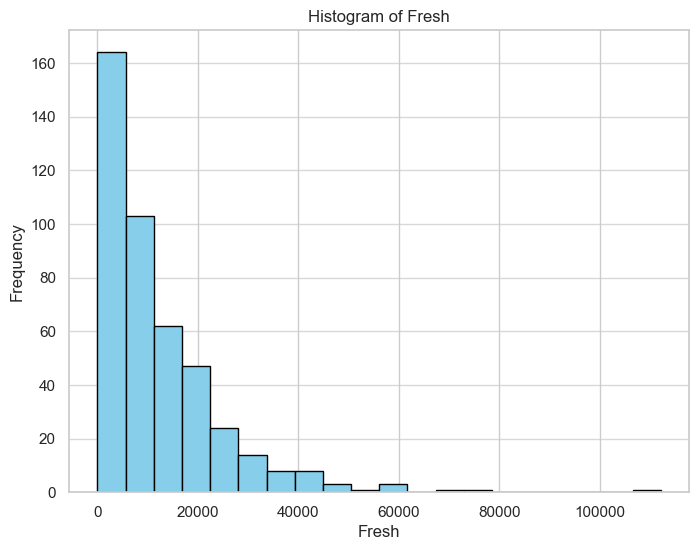

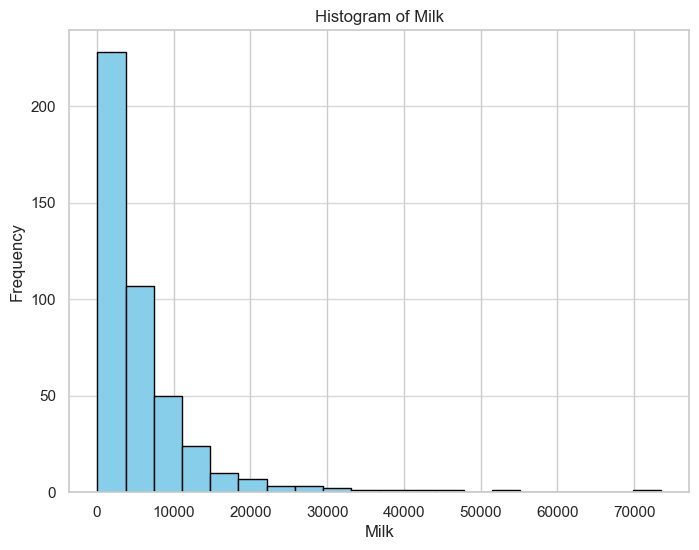

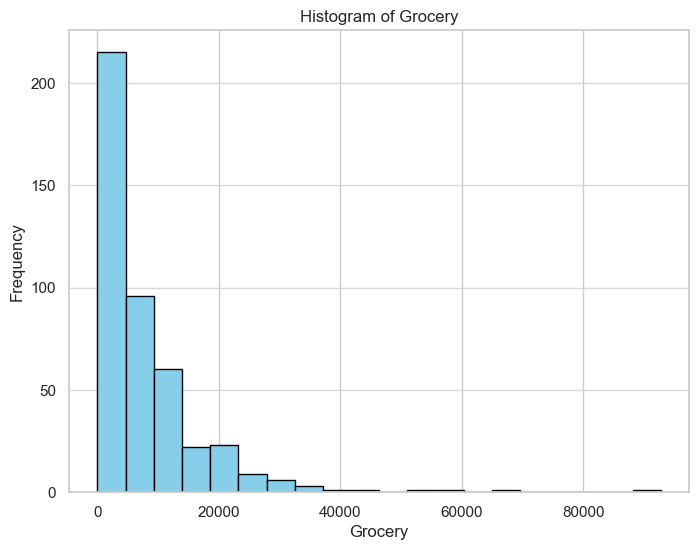

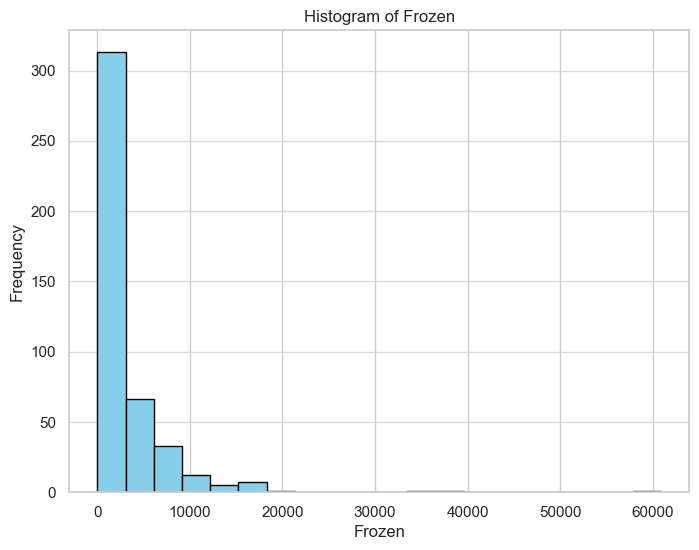

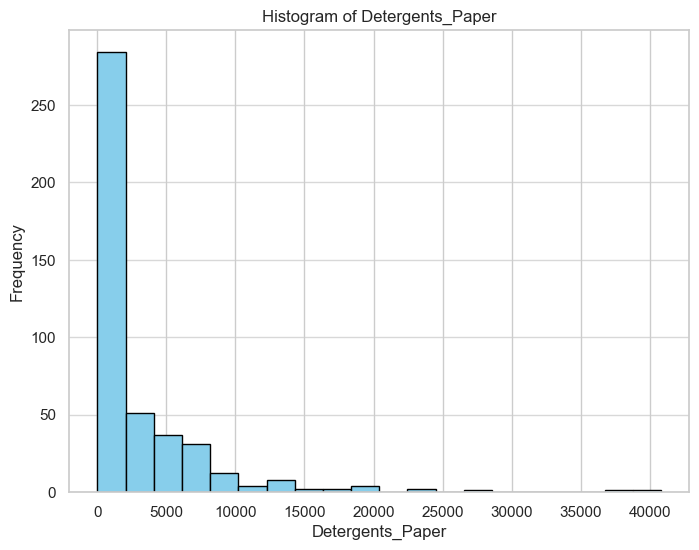

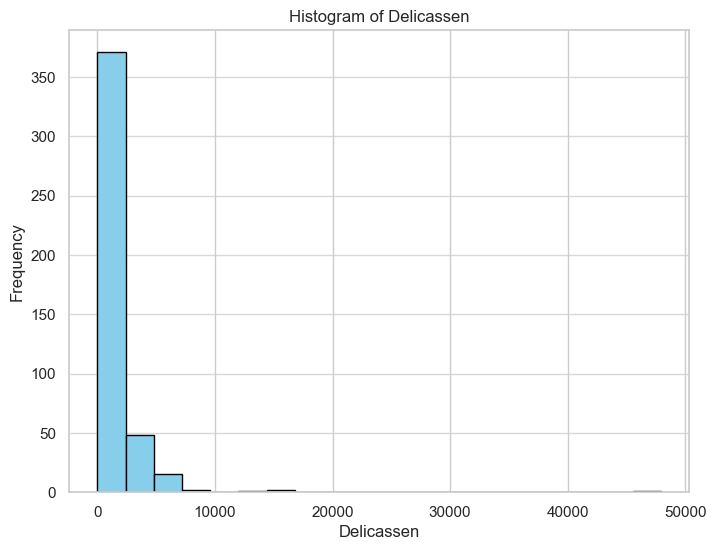

In [235]:
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

# Example usage:
# Assuming df is your DataFrame and columns_to_plot is the list of columns
num_col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plot_histograms(df, num_col)

all non-categorical data are positively skewed 

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


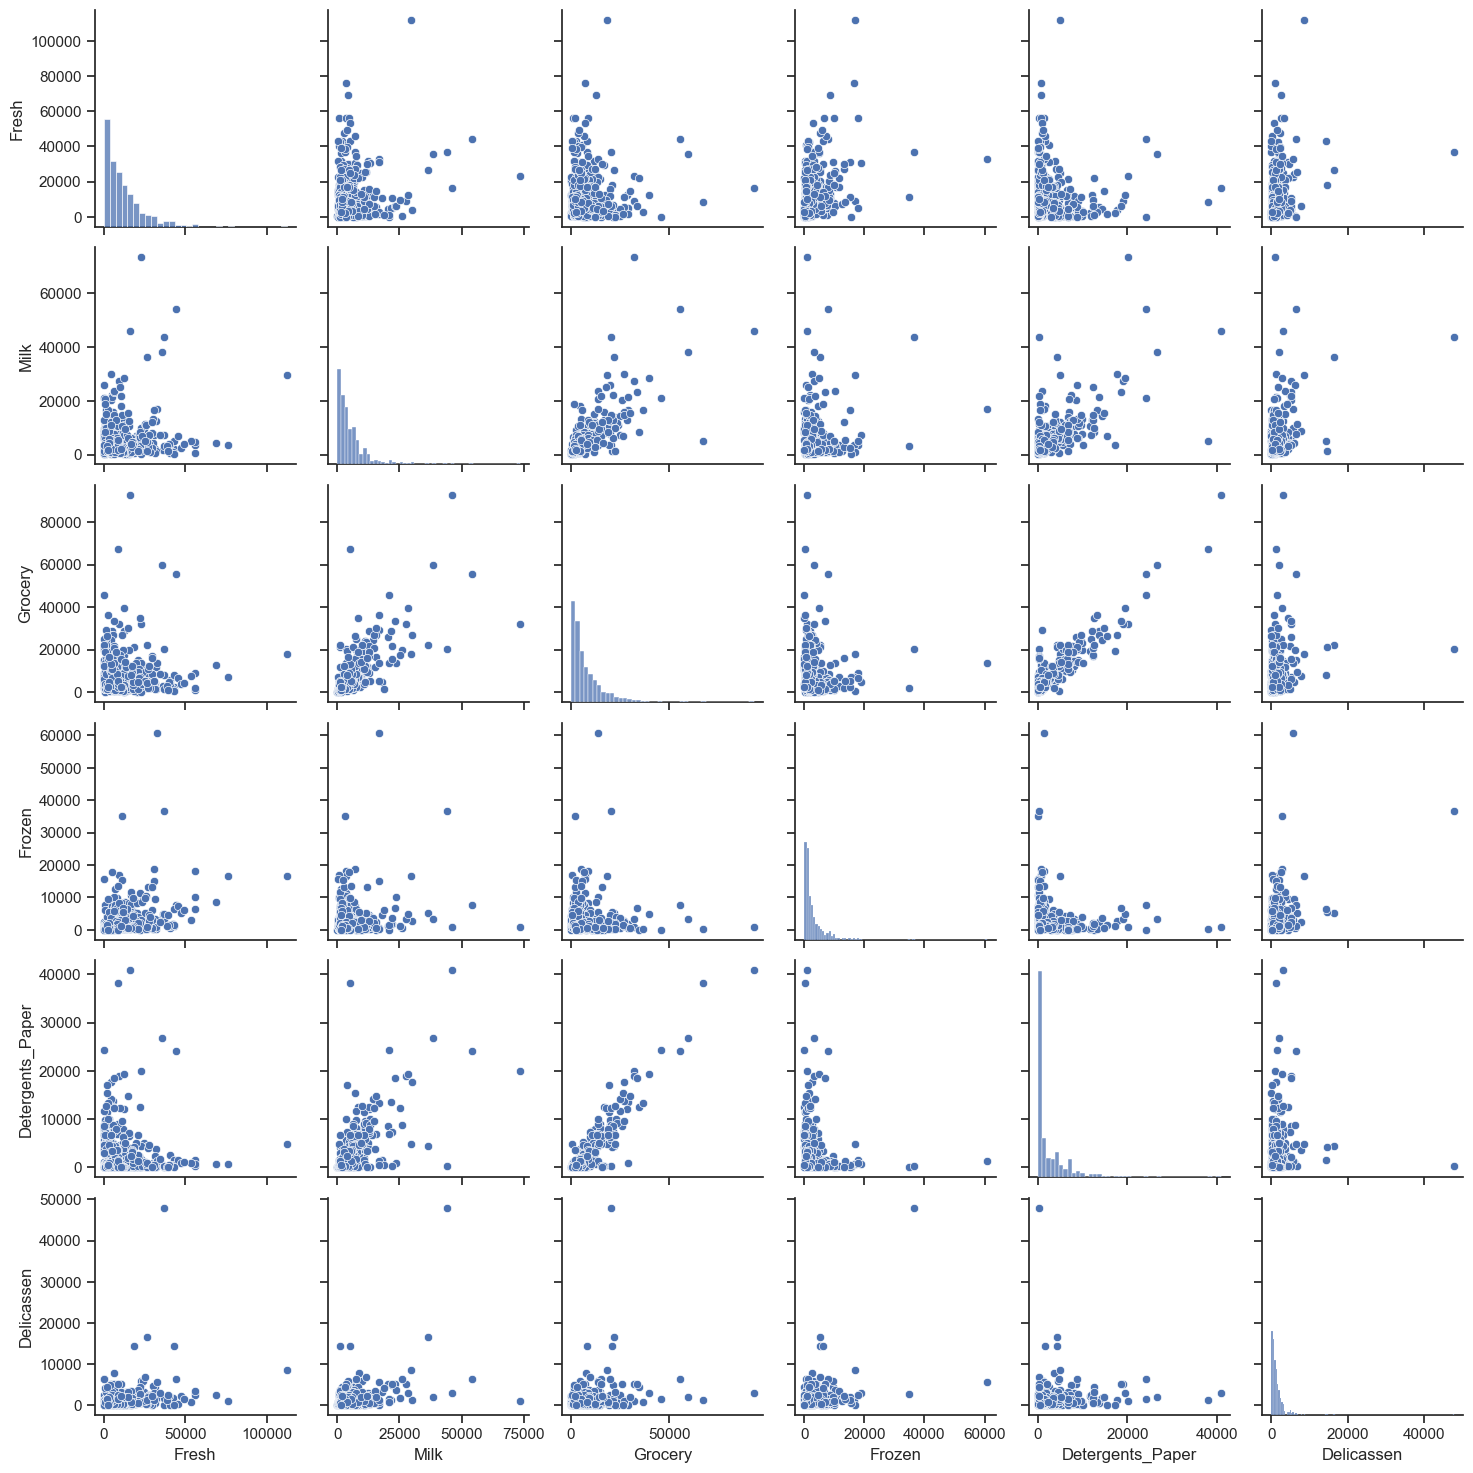

In [23]:
import seaborn as sns
# Plot scatterplots for all combinations
sns.set(style="ticks")
sns.pairplot(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.show()

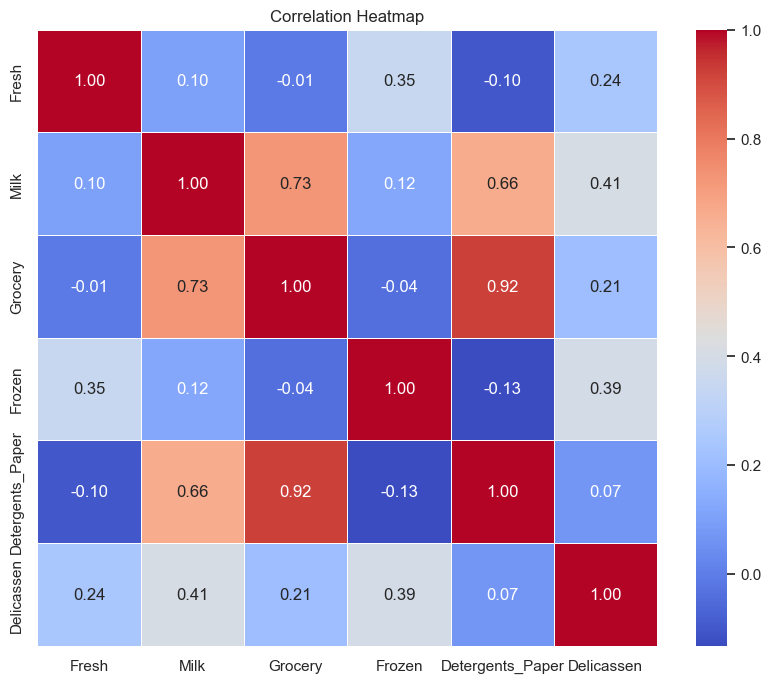

In [226]:
def plot_correlation_heatmap(df, columns):
    # Calculate the correlation matrix
    correlation_matrix = df[columns].corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage:
# Assuming df is your DataFrame and columns_to_correlate is the list of columns
columns_to_correlate = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plot_correlation_heatmap(df, columns_to_correlate)

 - **Grocery** and **Detergents_Paper** are highly correlated

 - **Grocery** and **Milk** are  well correlated

 - **Milk** and **Detergents_Paper** are  moderately well correlated

 - Only one of these components in this grouping should be used for creating clusters


# Outlier Check

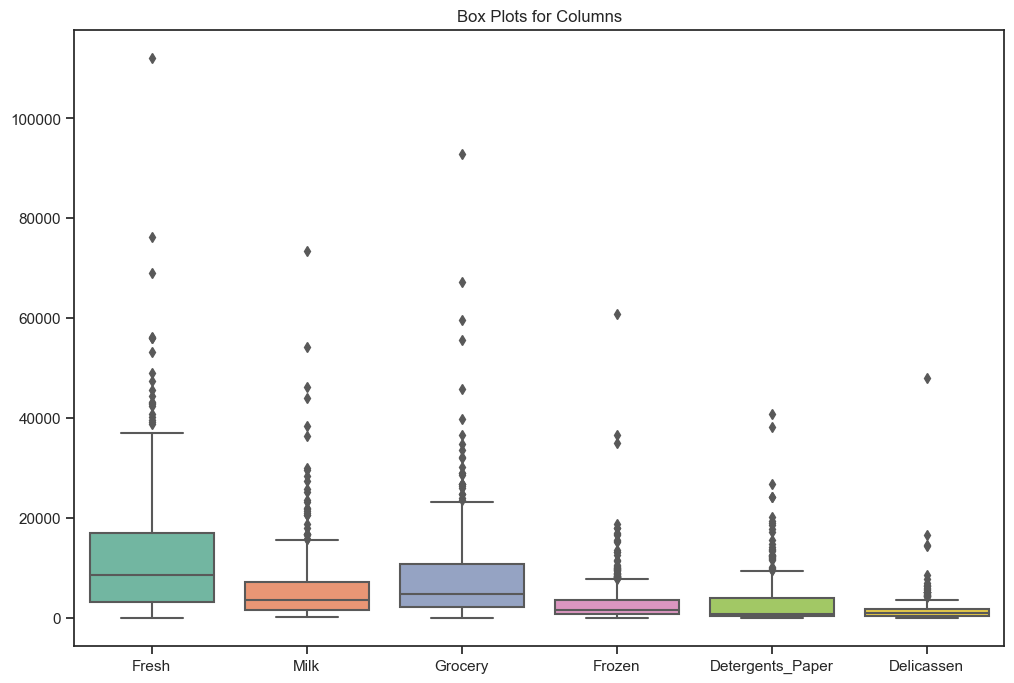

In [27]:
# Create box plots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], palette='Set2')
plt.title('Box Plots for Columns')
plt.show()

columns have similar patterns of outliers

# Preprocessing 

### boxcox transform

In [271]:
def apply_boxcox_transform(df, columns):
    """
    Apply Box-Cox transformation to specified columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns (list): List of columns to apply the Box-Cox transformation.

    Returns:
    - pd.DataFrame: Transformed DataFrame.
    """

    df_transformed = df.copy()

    for column in columns:
        if all(df_transformed[column] > 0):  # Box-Cox requires positive values
            transformed_values, _ = boxcox(df_transformed[column])
            df_transformed[column] = transformed_values

    return df_transformed

num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','Total_Spend']


df = apply_boxcox_transform(df, num_cols)

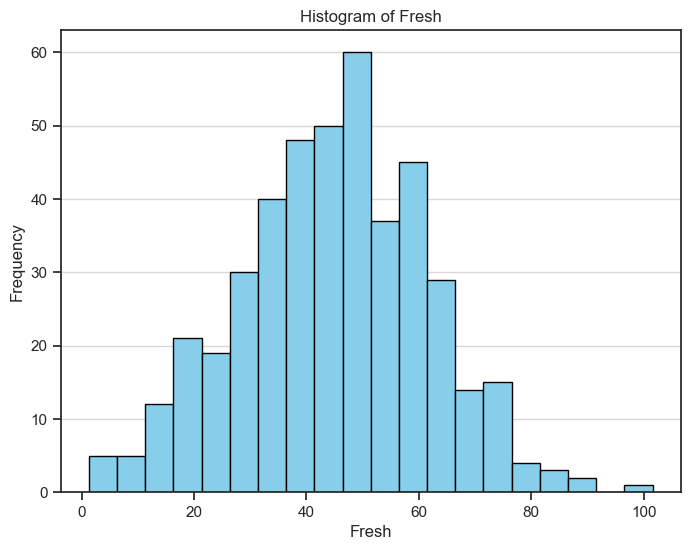

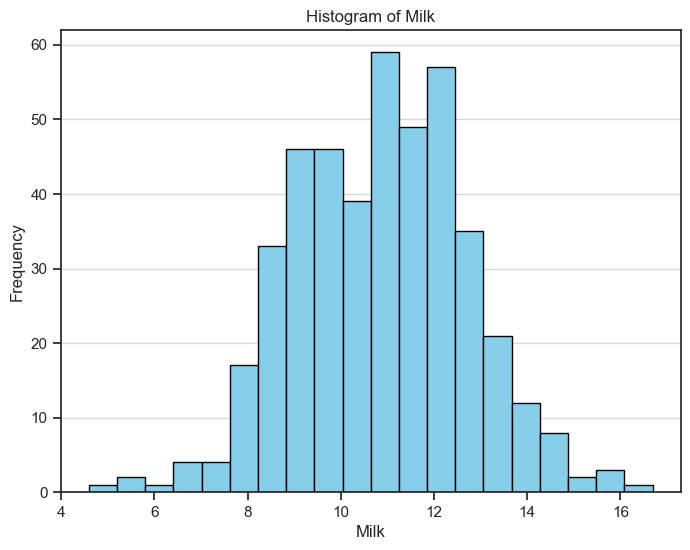

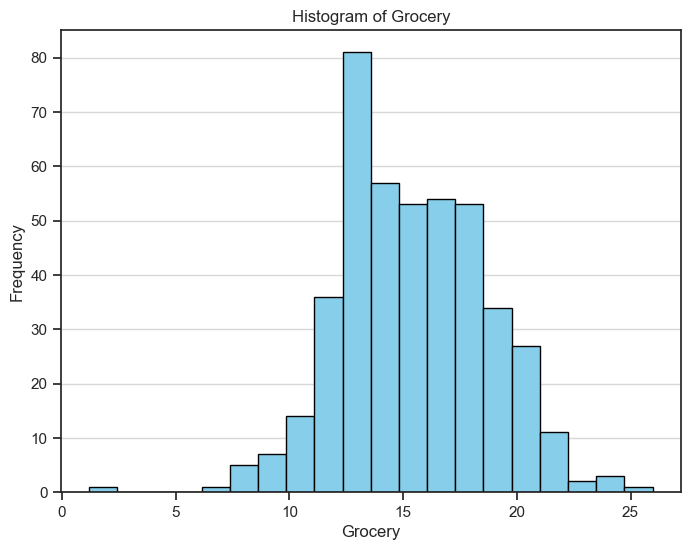

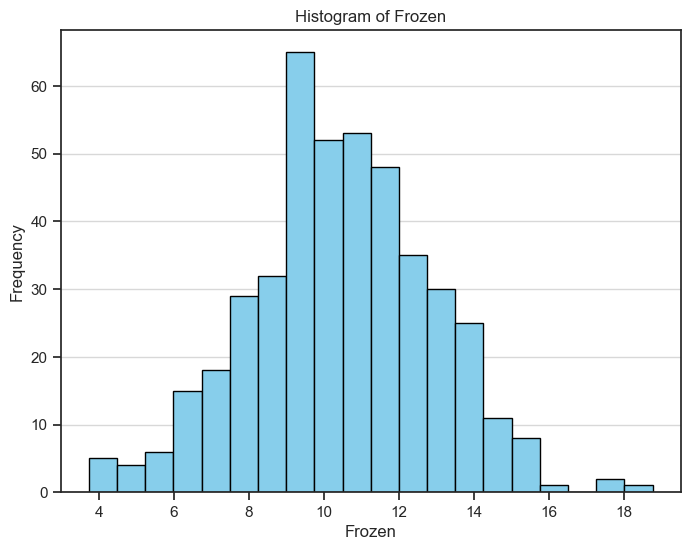

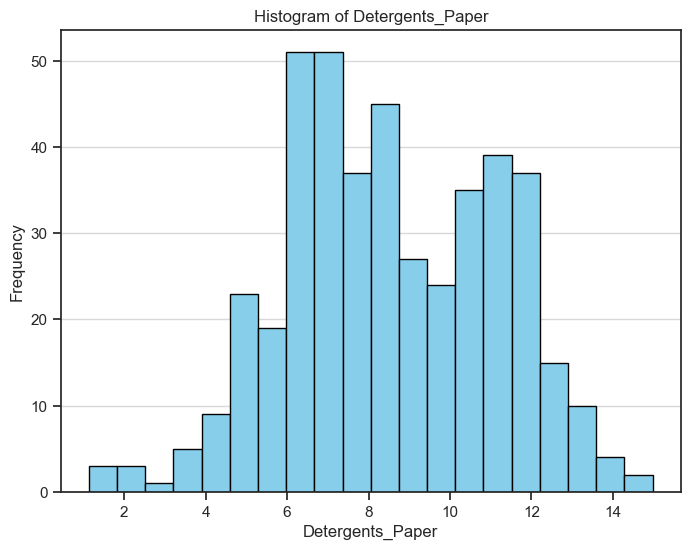

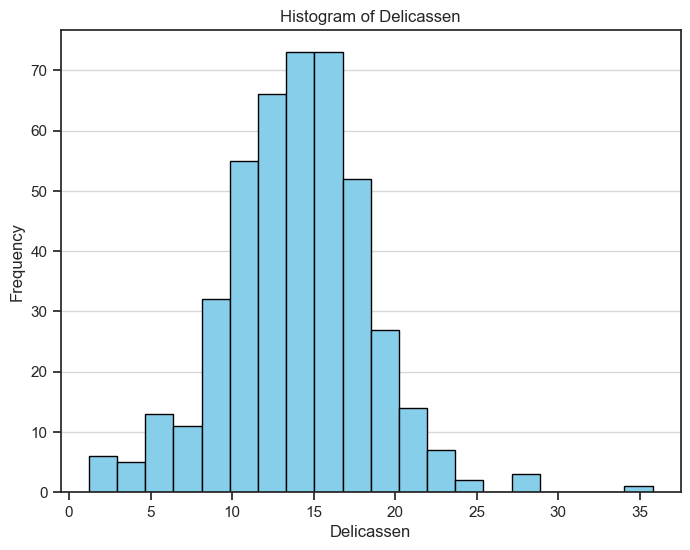

In [71]:
# Plot histograms for each column
for column in positively_skewed:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


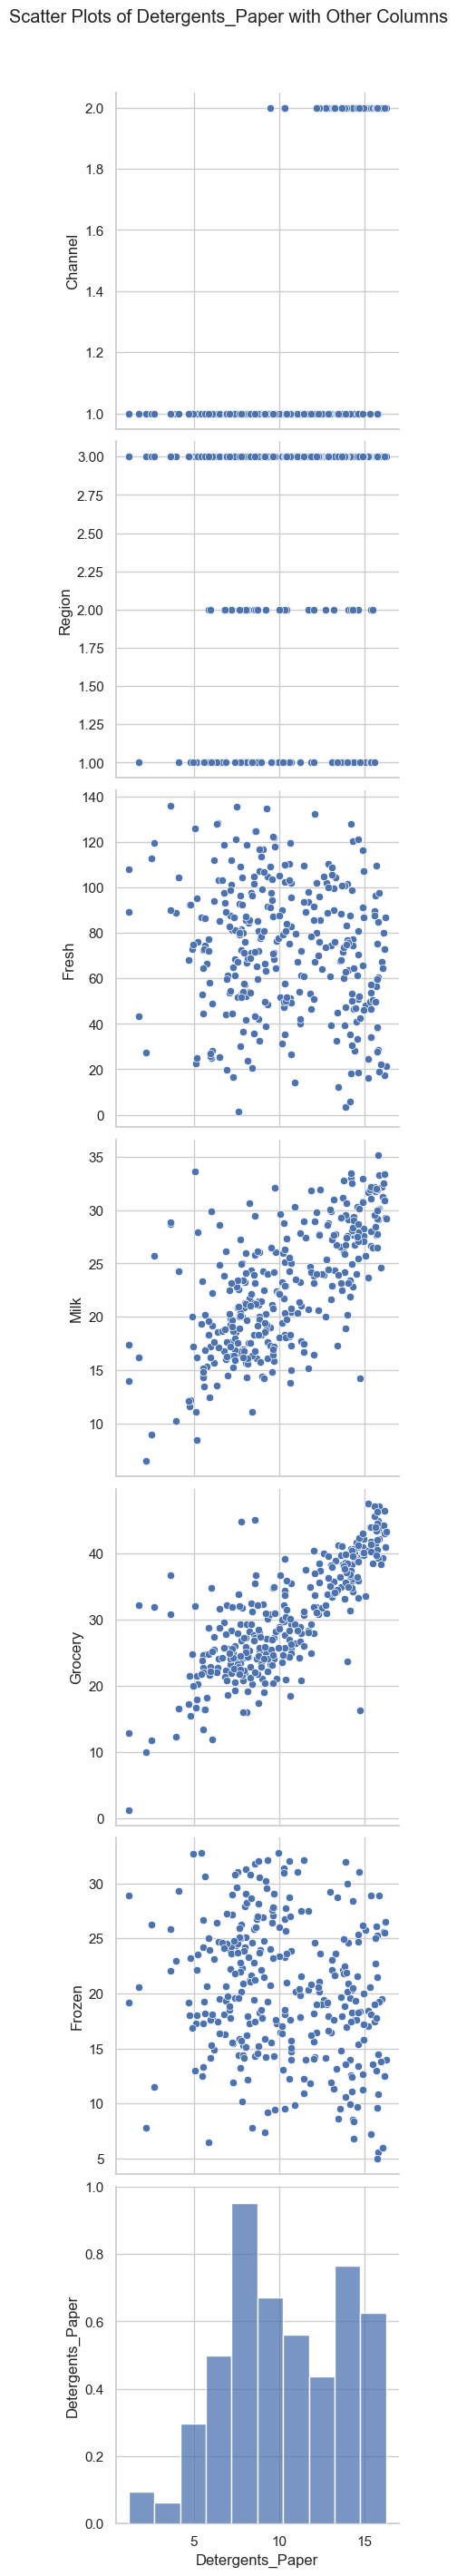

In [135]:
#since there is an interesting bimodal distribution in Detergents paper, I'd like to focus on this column 

# Scatter plots of Detergents_Paper with every other column
sns.set(style="whitegrid")
sns.pairplot(df, x_vars=["Detergents_Paper"], y_vars=df.columns[:-1], kind="scatter", height=4)
plt.suptitle("Scatter Plots of Detergents_Paper with Other Columns", y=1.02)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar ~~products~~ customers together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known t

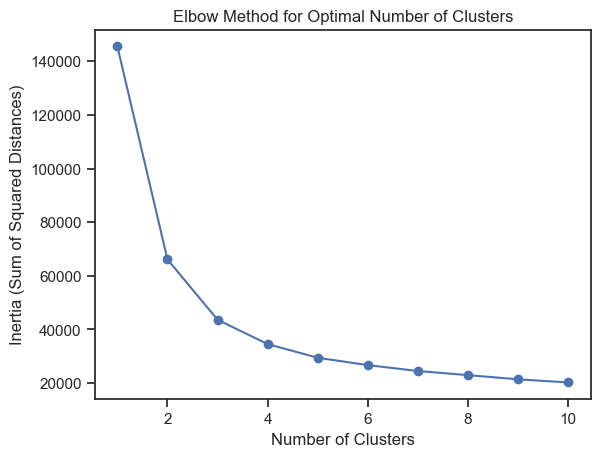

In [272]:
# Preprocess by dropping columns

#Visually inspected boxcox transformed histograms to see clusters in single columns, 
#then compared inspected scatter plots to find additional columns 
columns_for_clustering = num_cols
X = df[columns_for_clustering]

from sklearn import cluster
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Apply the Elbow Method
inertia_values = []
for i in range(1, 11):  # Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()



In [142]:
# 3 clusters confirmed as optimal using Elbow Method

In [275]:
import numpy as np

def initialize_centroids(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroids = data[indices]
    return centroids

# Step 2: Assign data points to clusters
def assign_to_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    return clusters

# Step 3: Update centroids
def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Step 4: KMeans algorithm
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        # Assign data points to clusters
        clusters = assign_to_clusters(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters



In [276]:
columns_for_conversion = num_cols

# Convert selected columns to an array of coordinates
coordinates_array = df[columns_for_conversion].values
coordinates_array

array([[51.73691948, 12.67029561, 16.69434241, ..., 10.1543134 ,
        15.47023211, 21.74221892],
       [42.98903138, 12.69955295, 17.44416932, ..., 10.49458356,
        16.62094059, 21.64800444],
       [41.57182822, 12.50094293, 16.74502057, ..., 10.60256513,
        23.79024317, 22.00896647],
       ...,
       [54.01501776, 13.55744399, 21.45326314, ..., 13.08884256,
        16.83052482, 24.98694294],
       [48.4530025 ,  9.89281189, 13.15049813, ...,  6.02201868,
        17.38281919, 19.40282338],
       [31.86135271,  9.63790402, 13.46788979, ...,  7.49839725,
         5.89999722, 16.60043738]])

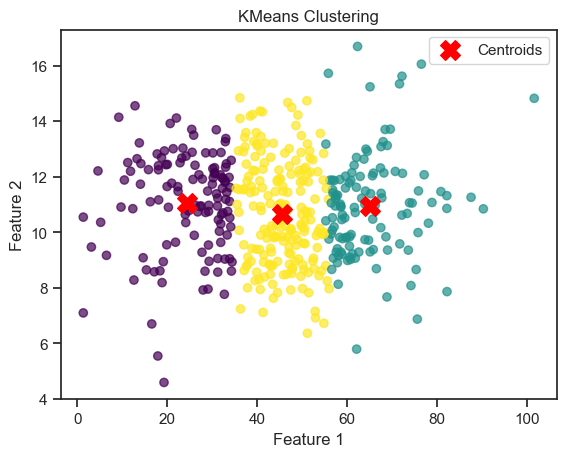

In [278]:
final_centroids, final_clusters = kmeans(coordinates_array, 3) #array from two columns Detergent_Paper and Grocery, and looking for 2 clusters

plt.scatter(coordinates_array[:, 0], coordinates_array[:, 1], c=final_clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [273]:
columns_for_conversion = ['Detergents_Paper', 'Grocery']

# Convert selected columns to an array of coordinates
coordinates_array = df[columns_for_conversion].values
coordinates_array

array([[51.73691948, 12.67029561, 16.69434241, ..., 10.1543134 ,
        15.47023211, 21.74221892],
       [42.98903138, 12.69955295, 17.44416932, ..., 10.49458356,
        16.62094059, 21.64800444],
       [41.57182822, 12.50094293, 16.74502057, ..., 10.60256513,
        23.79024317, 22.00896647],
       ...,
       [54.01501776, 13.55744399, 21.45326314, ..., 13.08884256,
        16.83052482, 24.98694294],
       [48.4530025 ,  9.89281189, 13.15049813, ...,  6.02201868,
        17.38281919, 19.40282338],
       [31.86135271,  9.63790402, 13.46788979, ...,  7.49839725,
         5.89999722, 16.60043738]])

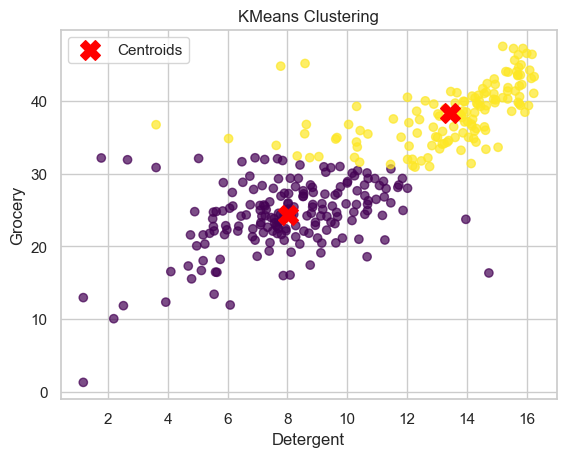

In [151]:

final_centroids, final_clusters = kmeans(coordinates_array, 2) #array from two columns Detergent_Paper and Grocery, and looking for 2 clusters

plt.scatter(coordinates_array[:, 0], coordinates_array[:, 1], c=final_clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Detergent')
plt.ylabel('Grocery')
plt.legend()


In [280]:
df['Cluster'] = final_clusters

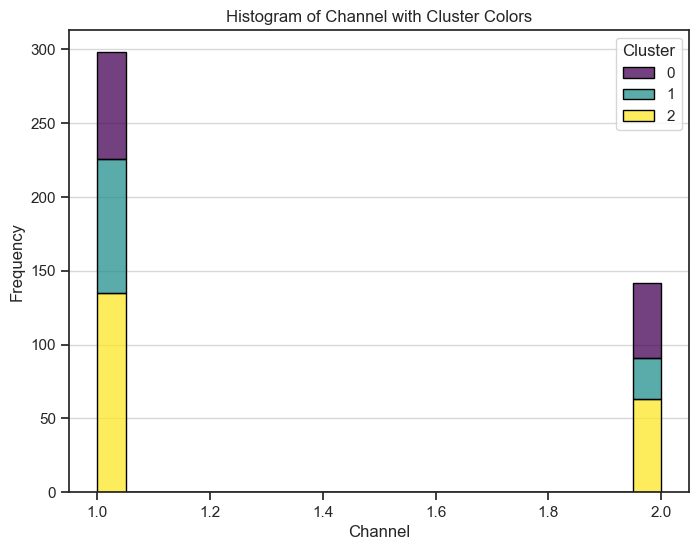

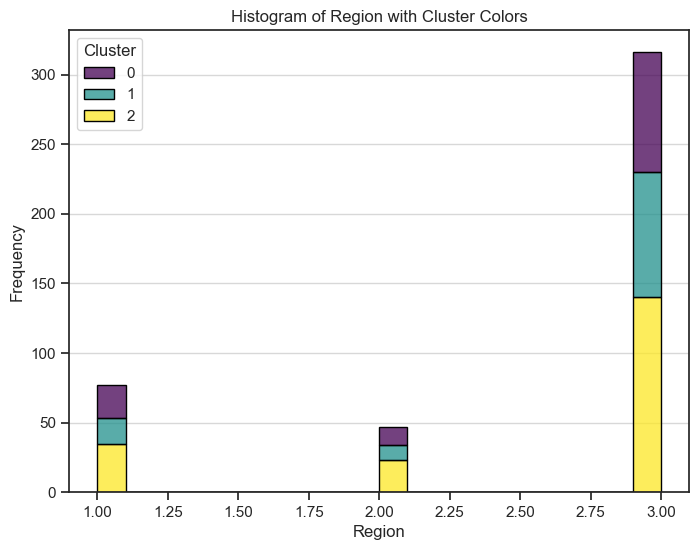

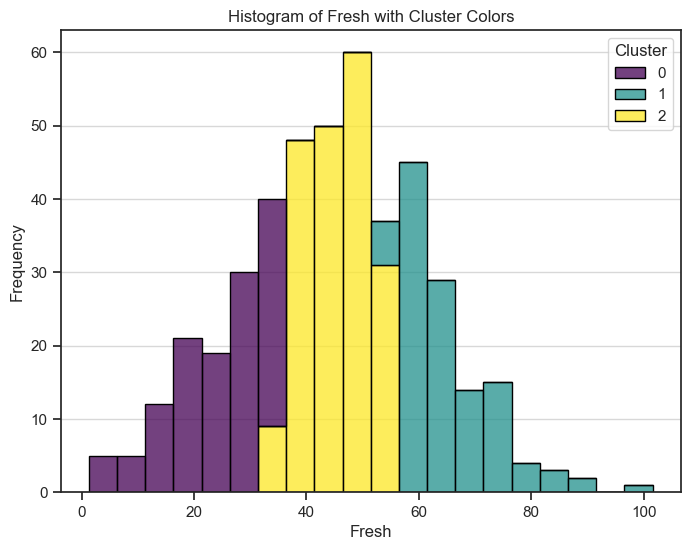

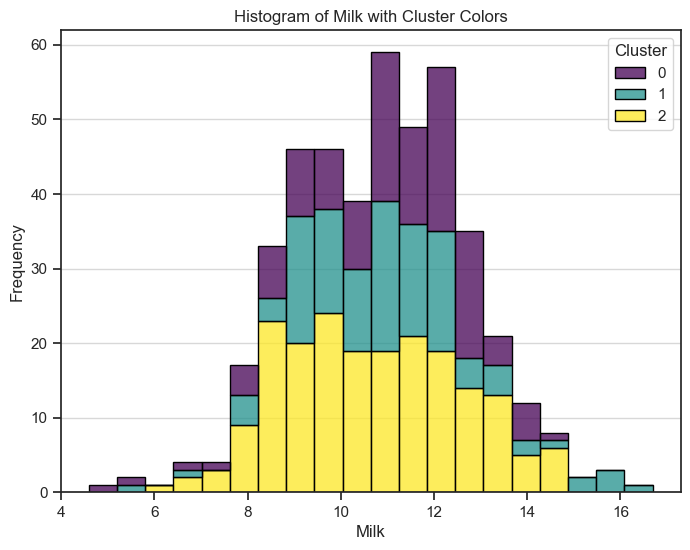

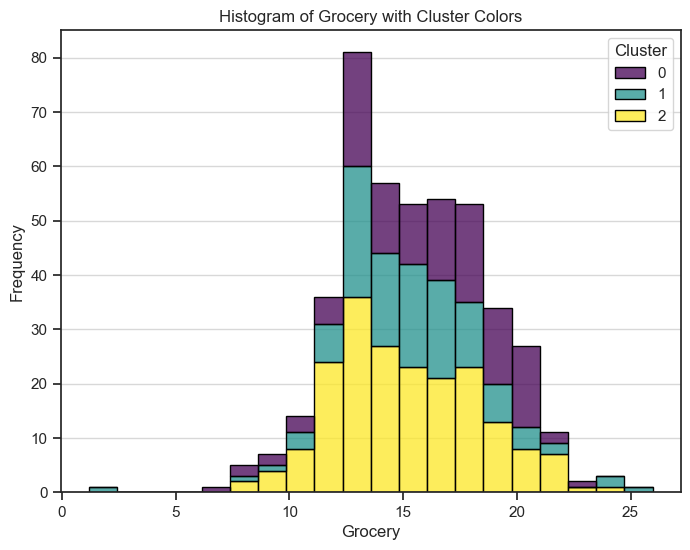

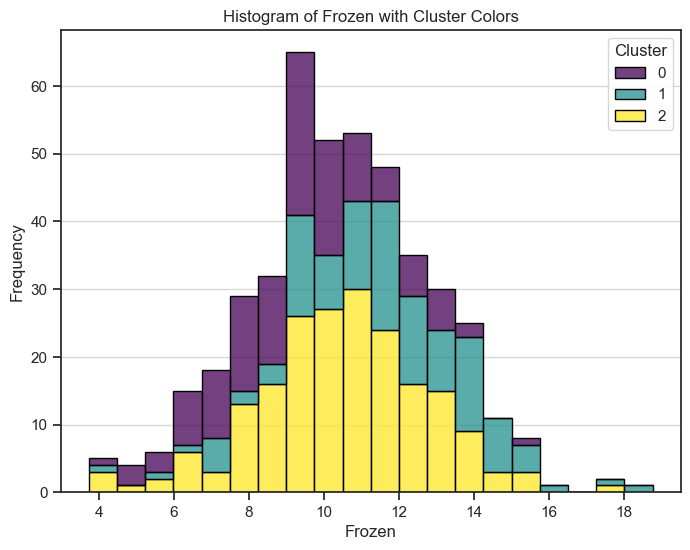

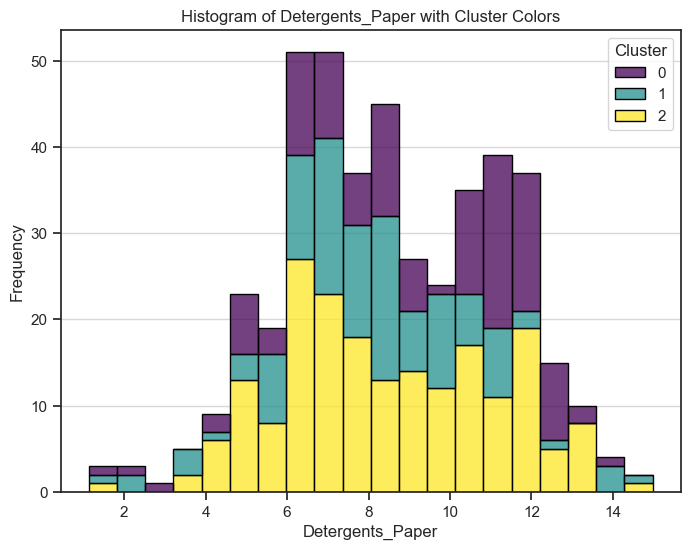

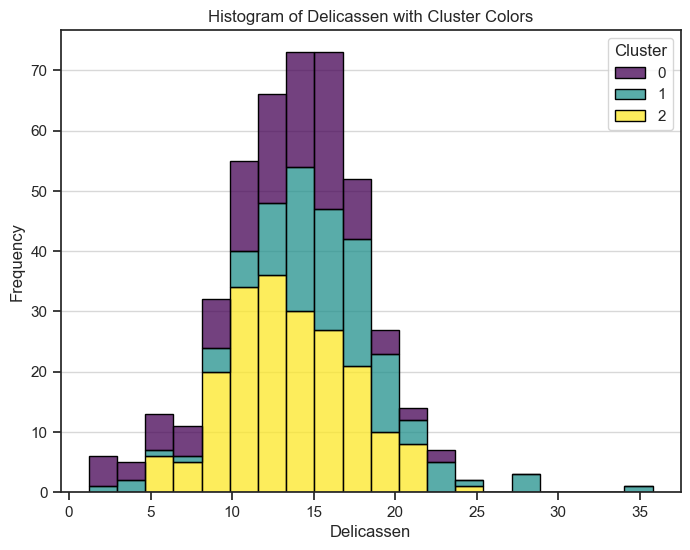

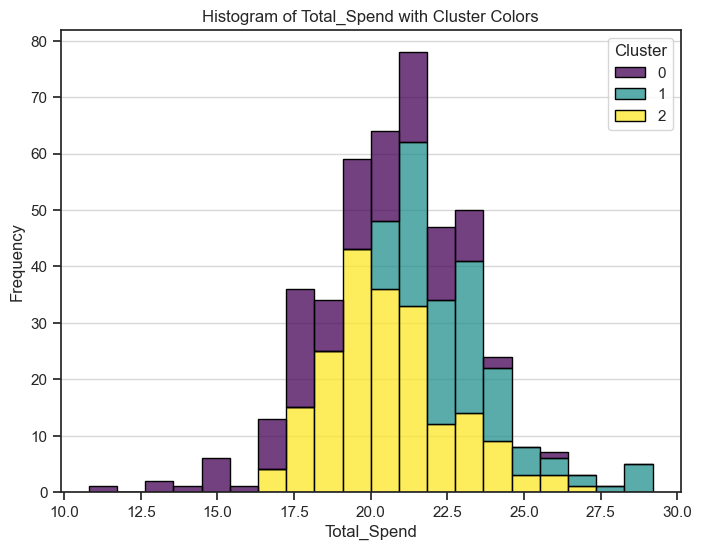

In [281]:
# Plot histograms with cluster colors
for column in df.columns:
    if column != 'Cluster':  # Skip the 'Cluster' column
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, bins=20, hue='Cluster', multiple='stack', edgecolor='black', palette='viridis')
        plt.title(f'Histogram of {column} with Cluster Colors')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

- Fresh   split by cluster 
- channel 2 is exclusively cluster 1 , and milk grovery and detergents are split fairly well 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [282]:
columns_for_clustering = num_col
X = df[columns_for_clustering]

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


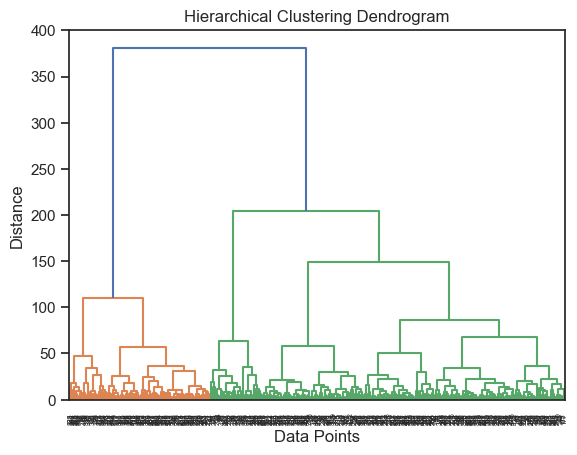

In [286]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage = 'ward')
y_agc_pred = agc.fit_predict(X)

# Plotting the dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [287]:


df['Cluster_Hier'] = y_agc_pred

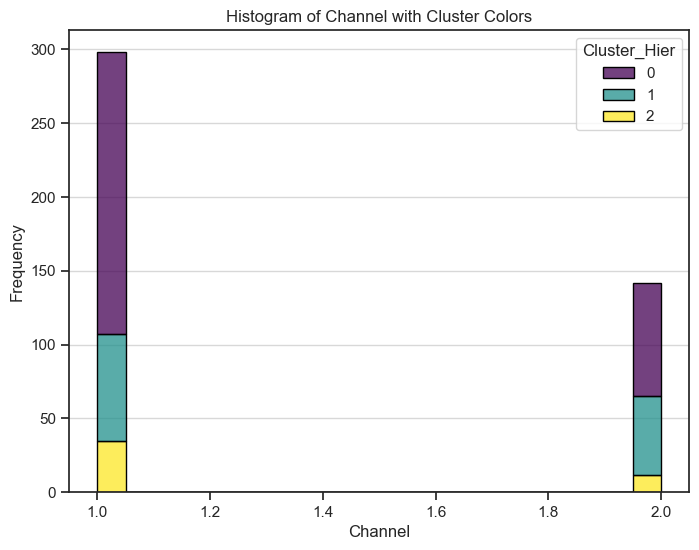

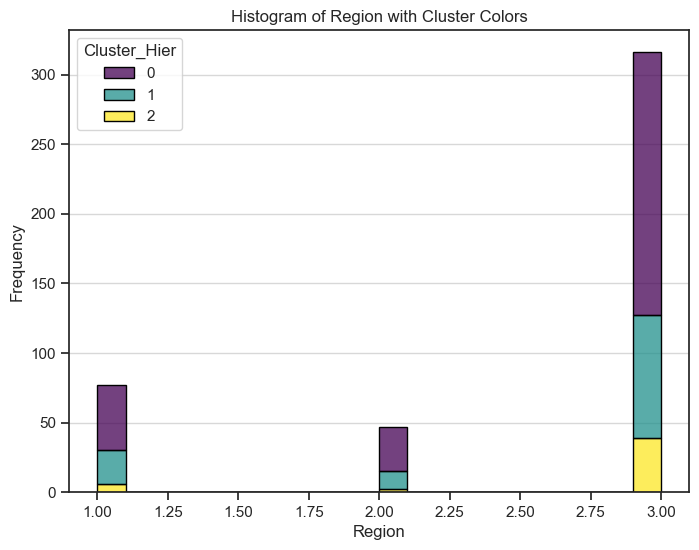

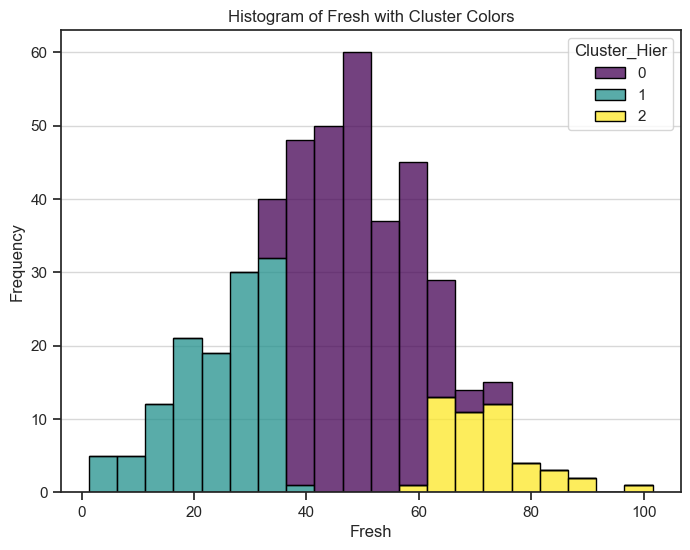

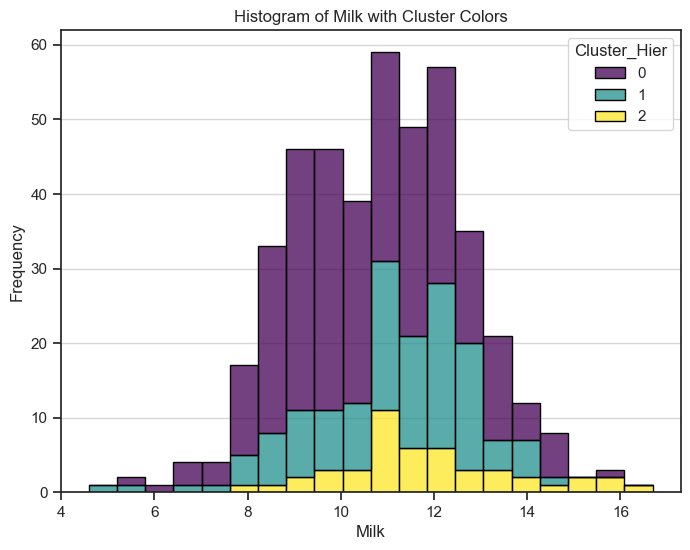

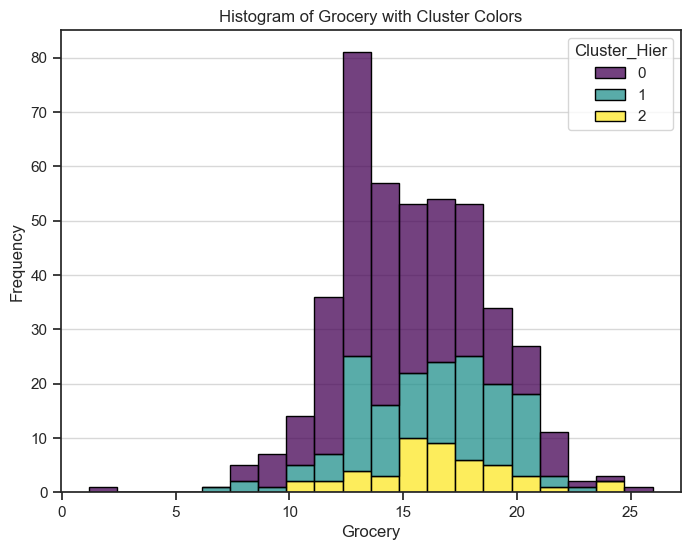

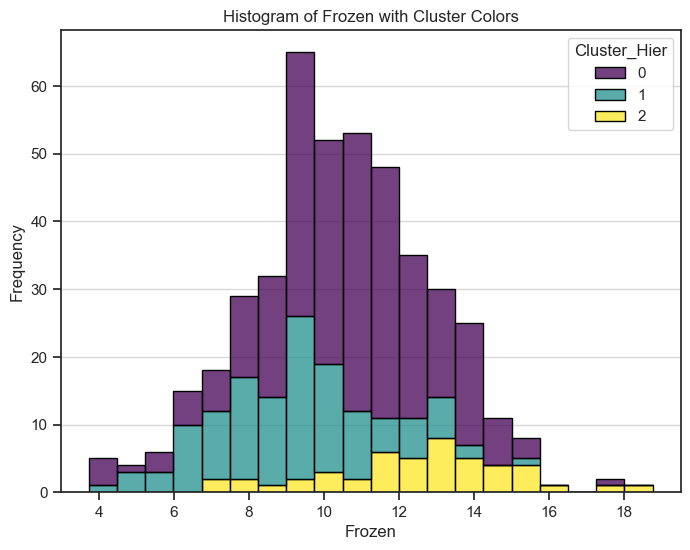

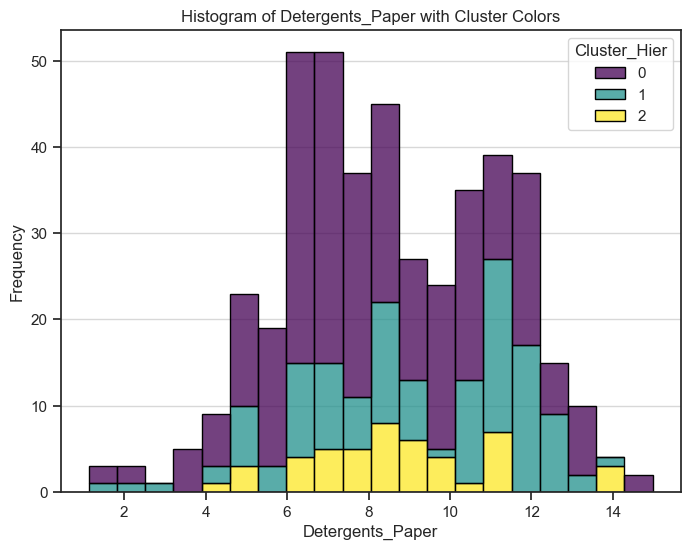

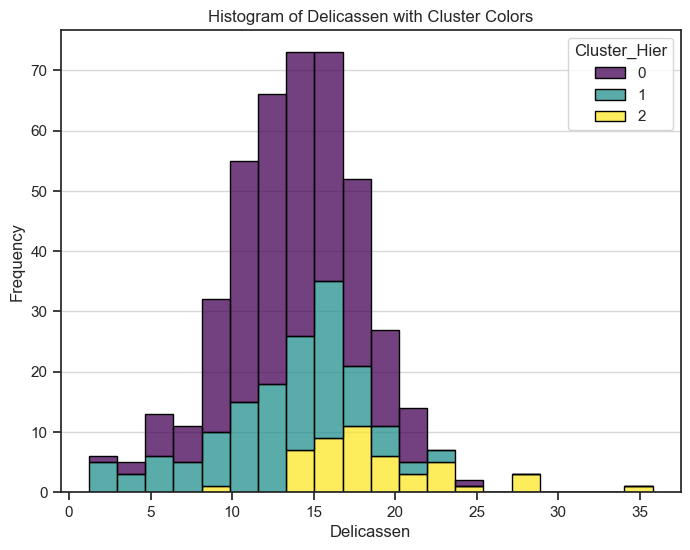

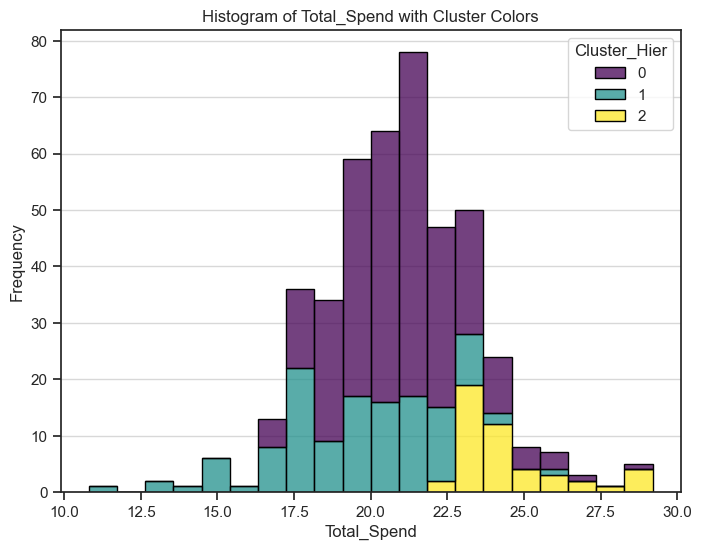

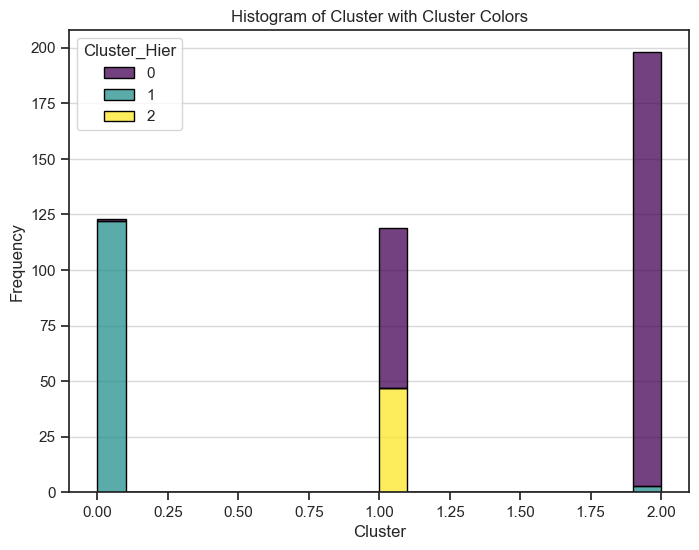

In [288]:
# Plot histograms with cluster colors
for column in df.columns:
    if column != 'Cluster_Hier':  # Skip the 'Cluster' column
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, bins=20, hue='Cluster_Hier', multiple='stack', edgecolor='black', palette='viridis')
        plt.title(f'Histogram of {column} with Cluster Colors')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

In [289]:
# fairly similar to Kmeans, but cutoffs are slightly different

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# PCA

In [178]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_cols=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X_num = df[num_cols]


# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_num)

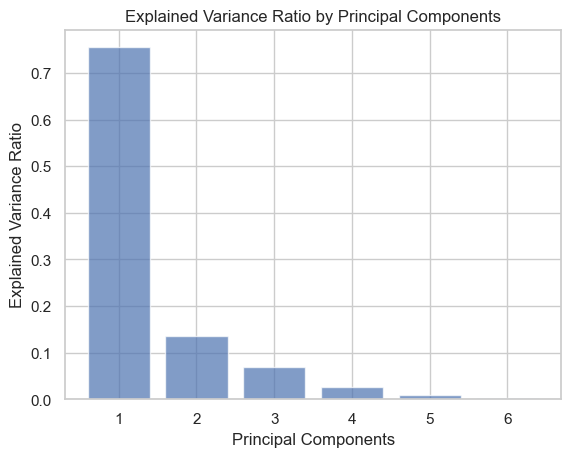

In [179]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [180]:
# Running total of explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
cumulative_variance_ratio

array([0.75528424, 0.89090252, 0.96055271, 0.98766792, 0.99663417,
       1.        ])

In [50]:
# split results of PCA into 2 batches for testing a 4 component and a 2 component as this is where  drops happen


In [201]:


# Apply PCA for 2 components
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_num)




In [183]:
singular_values = pca_2.singular_values_

# Display the singular values
print("Singular Values for Principal Components:")
print(singular_values)

Singular Values for Principal Components:
[520.8964895  220.72693787]


In [202]:
# Apply PCA for 3 components
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_num)


# Get the loadings for each original feature
loadings = pd.DataFrame(pca_2.components_.T, columns=[f'PC{i+1}' for i in range(X_pca2.shape[1])], index=num_cols)

# Display the loadings
print("Loadings:")
print(loadings)

Loadings:
                       PC1       PC2
Fresh            -0.990721  0.072594
Milk              0.013422 -0.298781
Grocery           0.025072 -0.435815
Frozen           -0.069495  0.033077
Detergents_Paper  0.022024 -0.149469
Delicassen       -0.111127 -0.831920


In [203]:
loadings

,PC1,PC2
Fresh,-0.990721,0.072594
Milk,0.013422,-0.298781
Grocery,0.025072,-0.435815
Frozen,-0.069495,0.033077
Detergents_Paper,0.022024,-0.149469
Delicassen,-0.111127,-0.831920


<Figure size 1000x600 with 0 Axes>

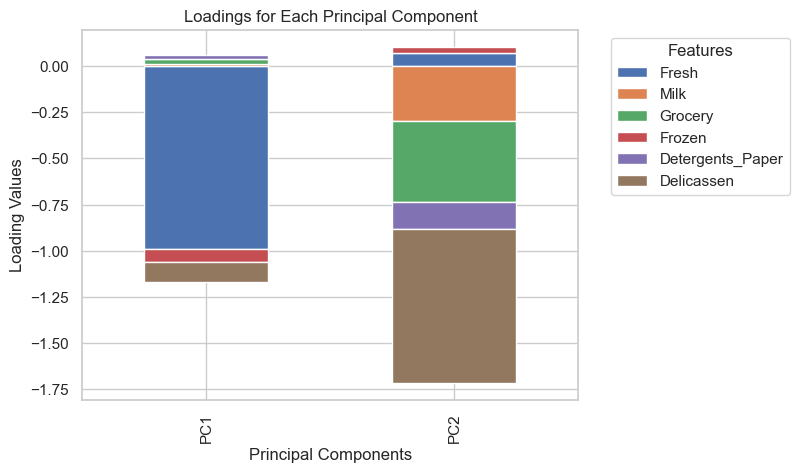

In [204]:

loadings_df = pd.DataFrame(loadings)

# Plot the loadings table
plt.figure(figsize=(10, 6))
loadings_df.T.plot(kind='bar', stacked=True)
plt.title('Loadings for Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Loading Values')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
 - 

# Bonus split data into channels before clustering 

In [252]:
# read data

data = 'Wholesale_Data.csv'

df = pd.read_csv(data)

In [253]:


#Split into 2 Channels (already partically segmented)
df_channel_1 = df[df['Channel'] == 1]
df_channel_2 = df[df['Channel'] == 2]

In [255]:


# Statistical description for Channel 1
desc_channel_1 = df_channel_1.describe()

# Statistical description for Channel 2
desc_channel_2 = df_channel_2.describe()




In [256]:
desc_channel_1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,0.0,0.805013,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,1.0,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.0,2.000000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,1.0,3.000000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,1.0,3.000000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,1.0,3.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000


In [257]:
desc_channel_2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.0,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,0.0,0.703069,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,2.0,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,2.0,2.000000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,2.0,3.000000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,2.0,3.000000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,2.0,3.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000


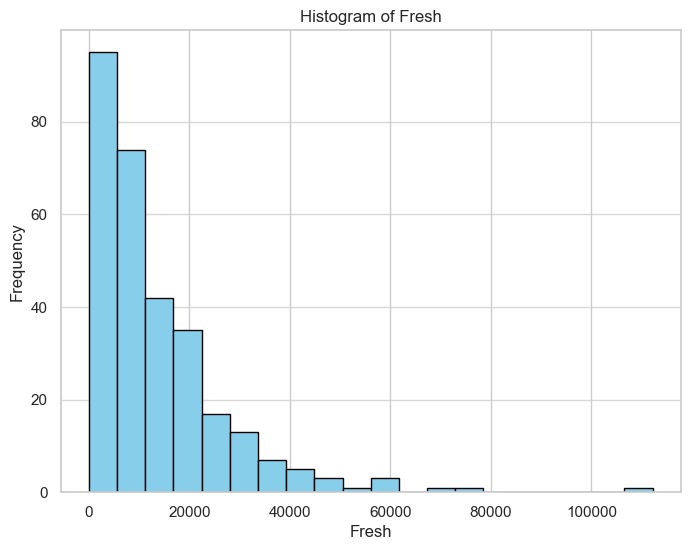

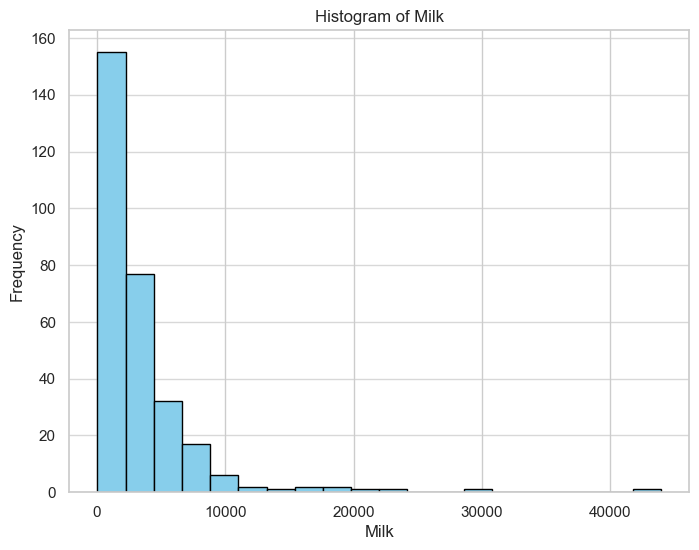

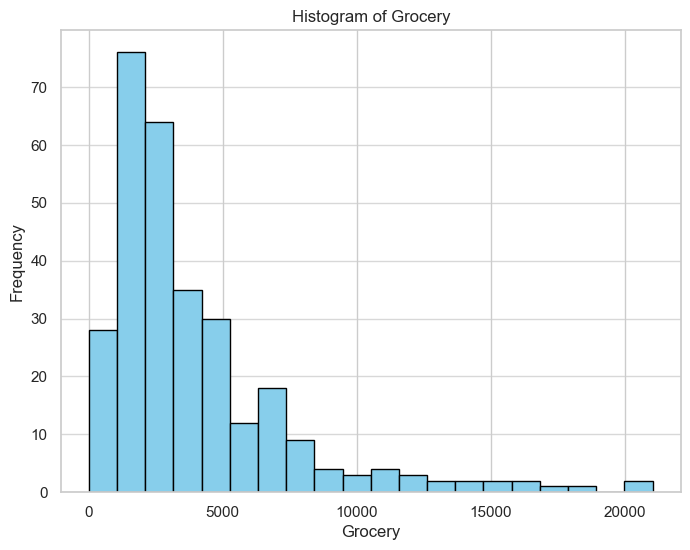

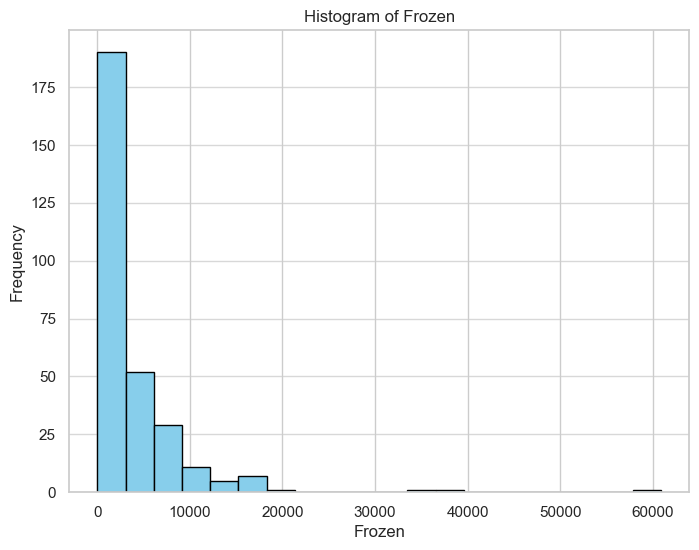

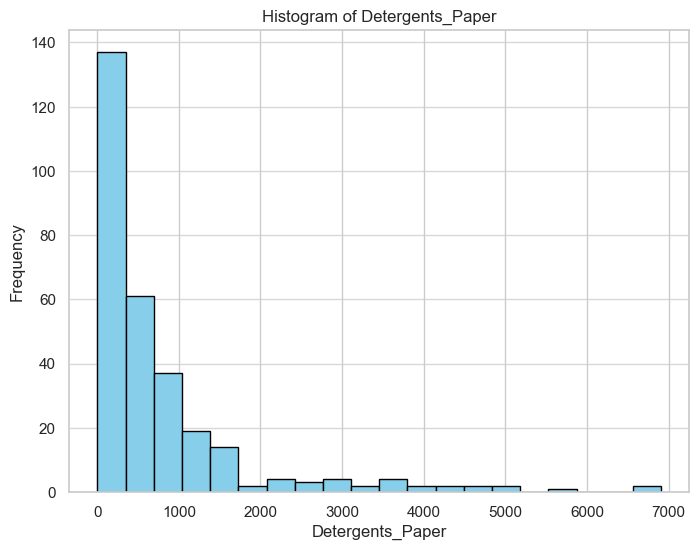

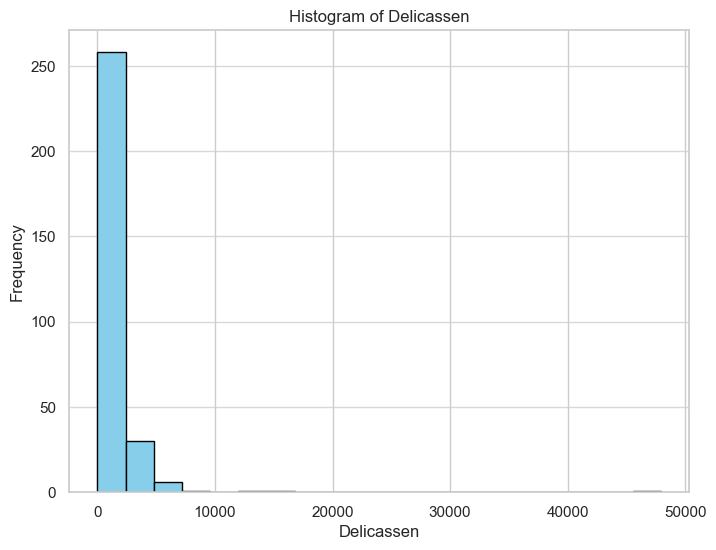

In [236]:
num_col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plot_histograms(df_channel_1, num_col)

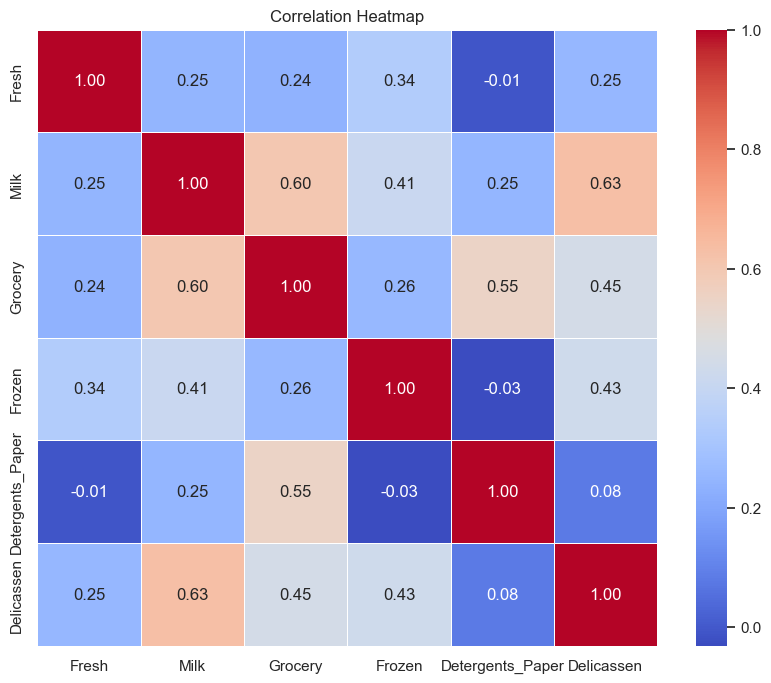

In [237]:
plot_correlation_heatmap(df_channel_1, num_col)

In [240]:
df_channel_1=apply_boxcox_transform(df_channel_1, num_cols)

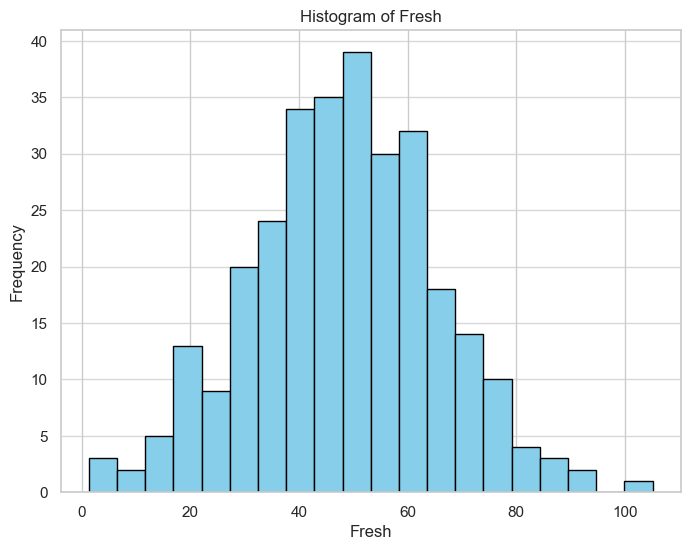

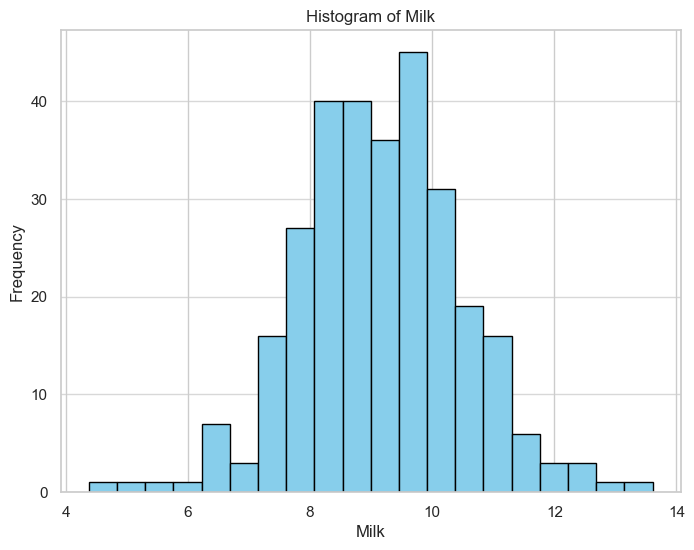

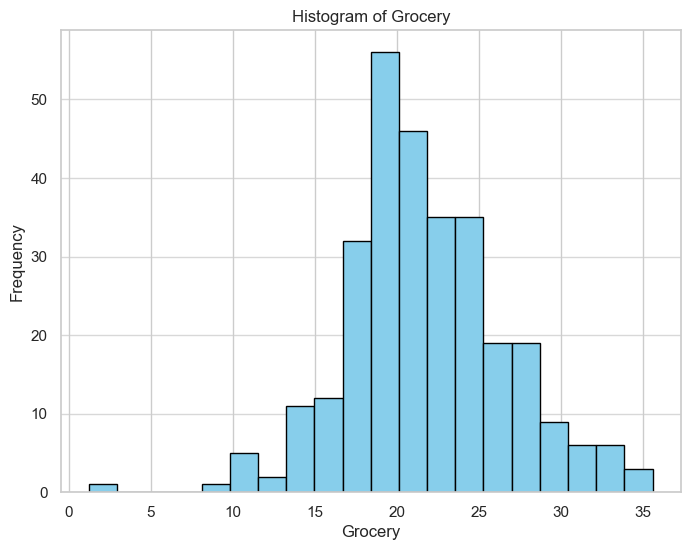

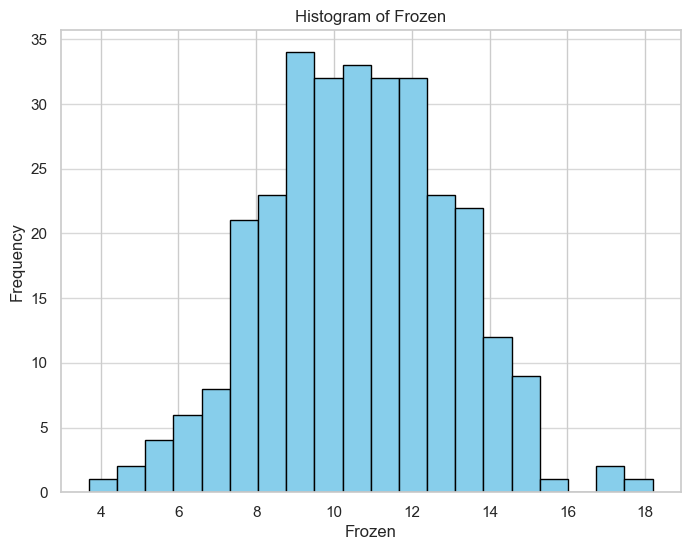

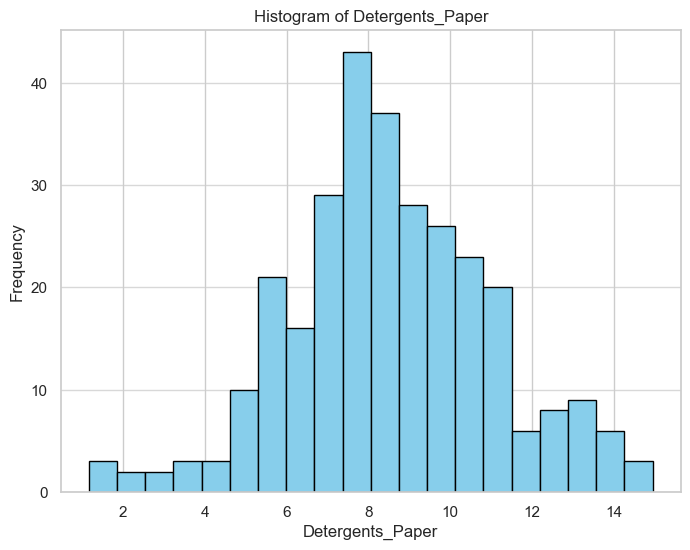

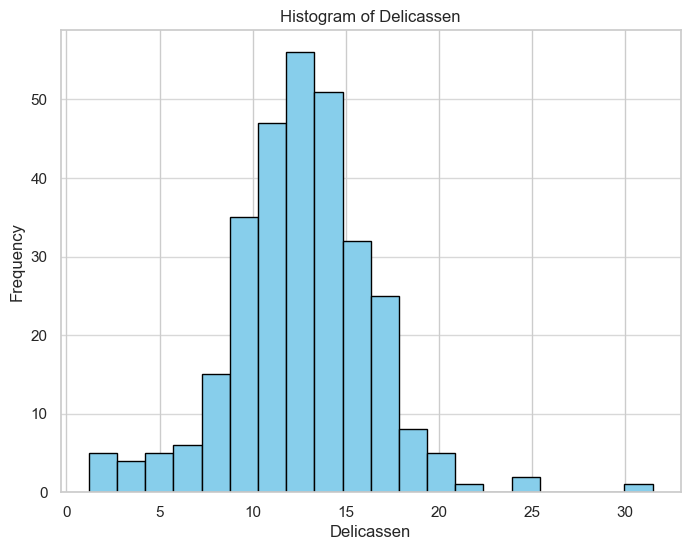

In [241]:
plot_histograms(df_channel_1, num_col)

In [242]:
# left tail on Delicassen 

# right "bump" on Detergents_Paper

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


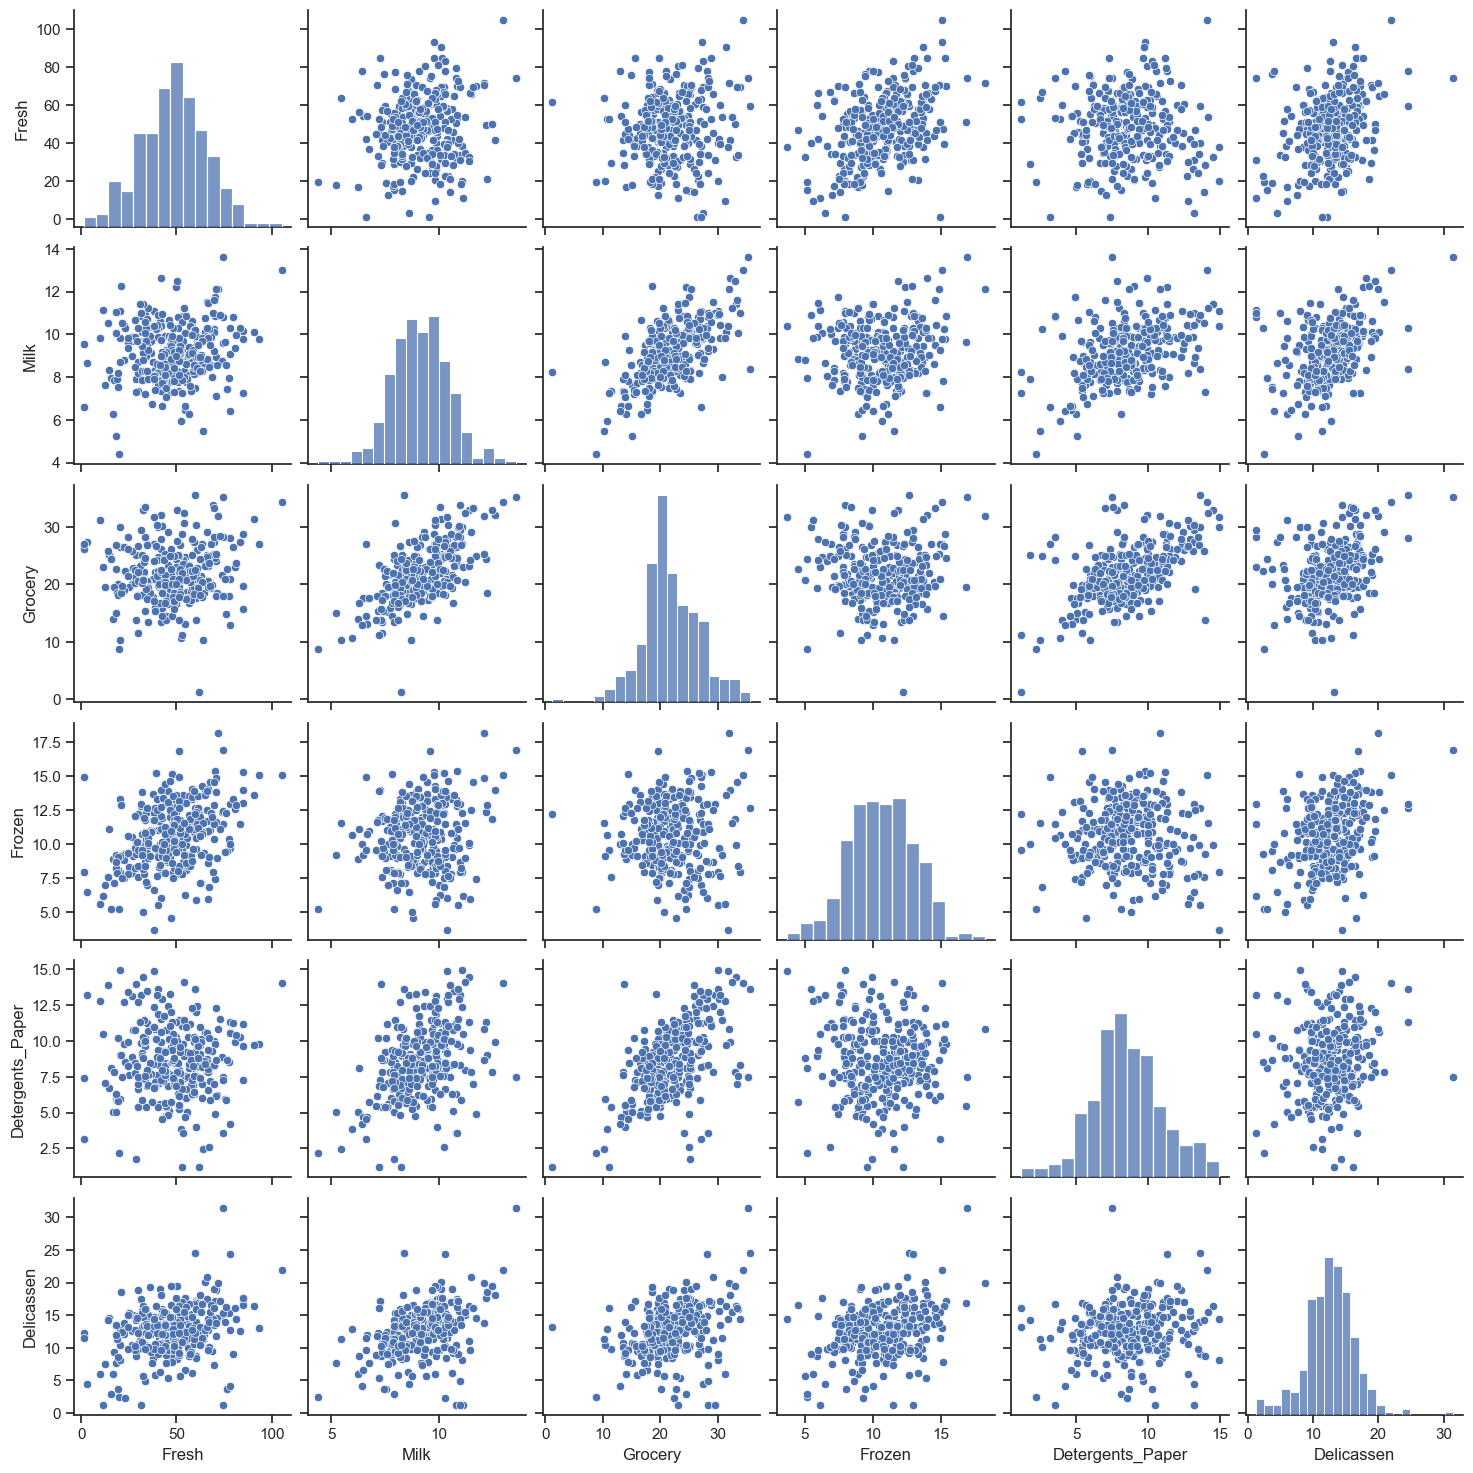

In [244]:

# Plot scatterplots for all combinations
sns.set(style="ticks")
sns.pairplot(df_channel_1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.show()

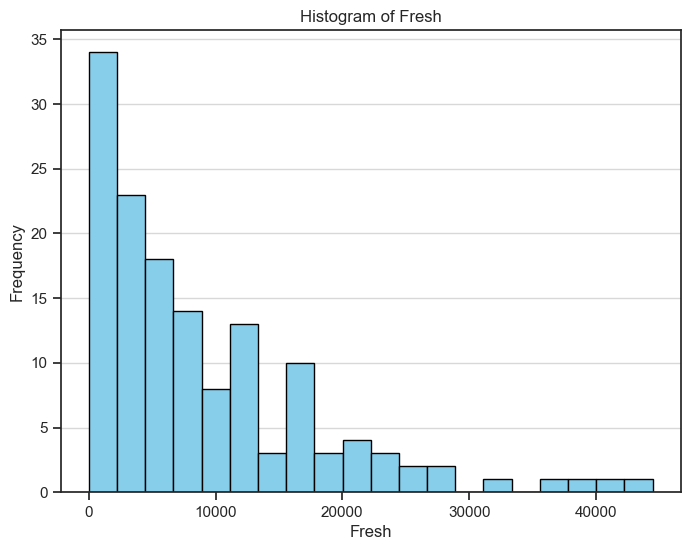

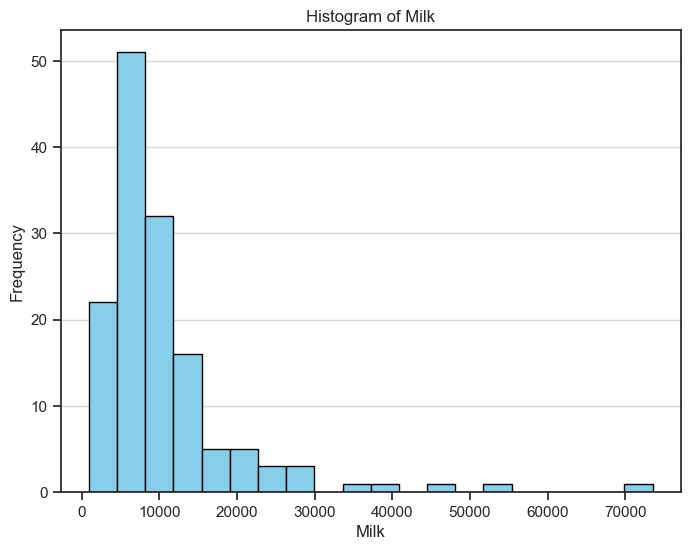

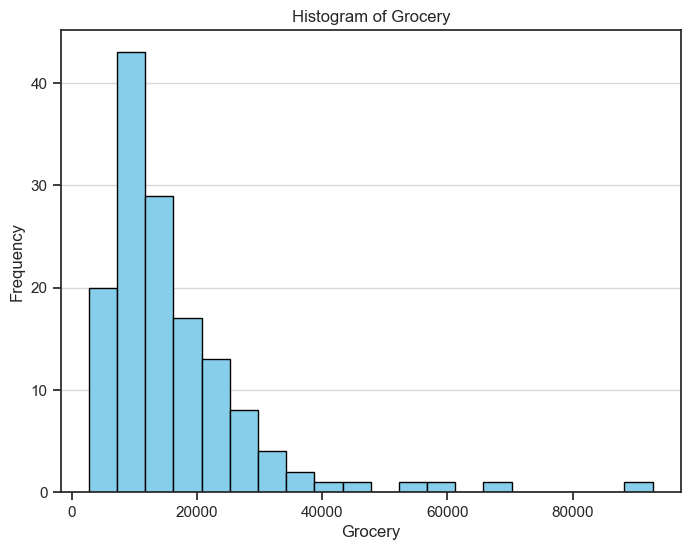

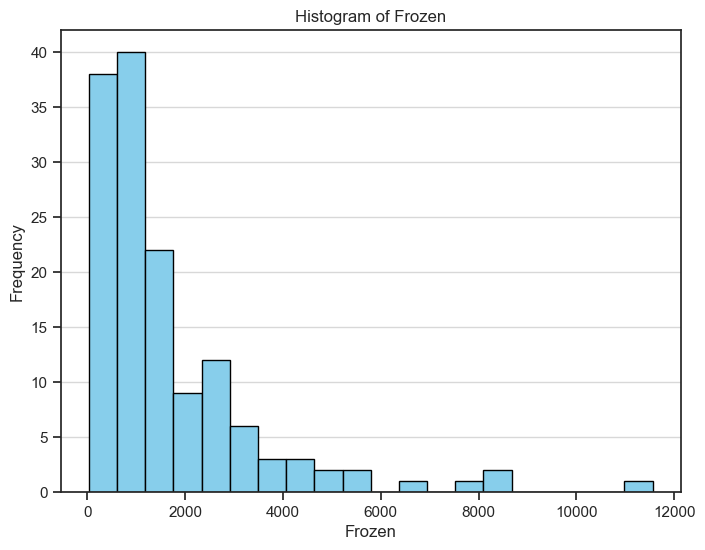

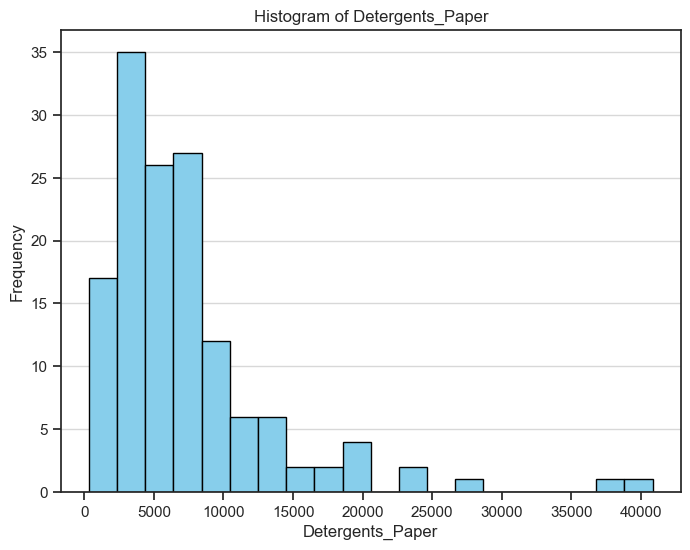

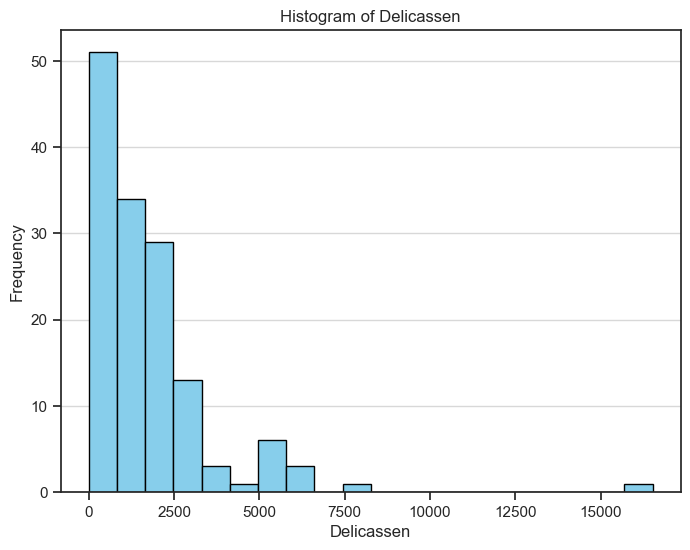

In [246]:
num_col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plot_histograms(df_channel_2, num_col)

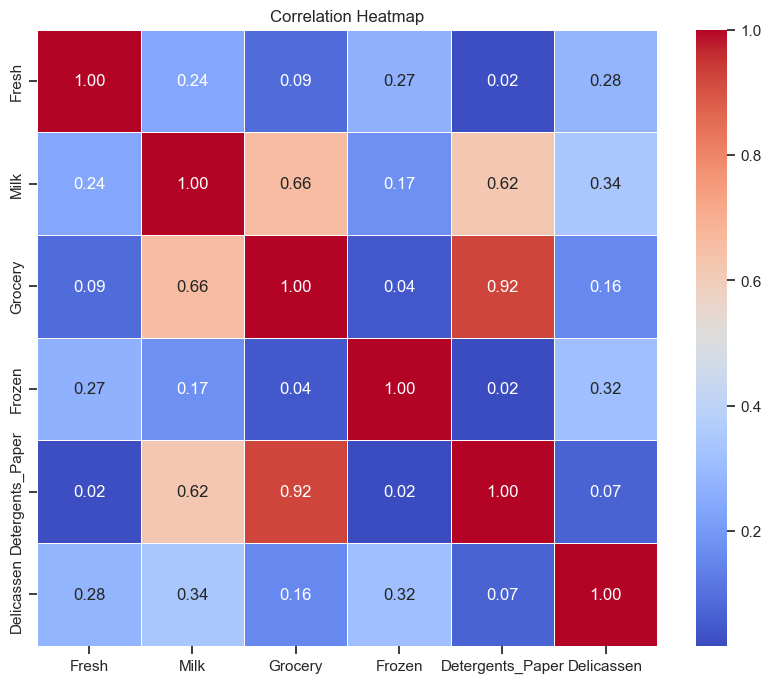

In [247]:
plot_correlation_heatmap(df_channel_2, num_col)

In [249]:
df_channel_2=apply_boxcox_transform(df_channel_2, num_cols)

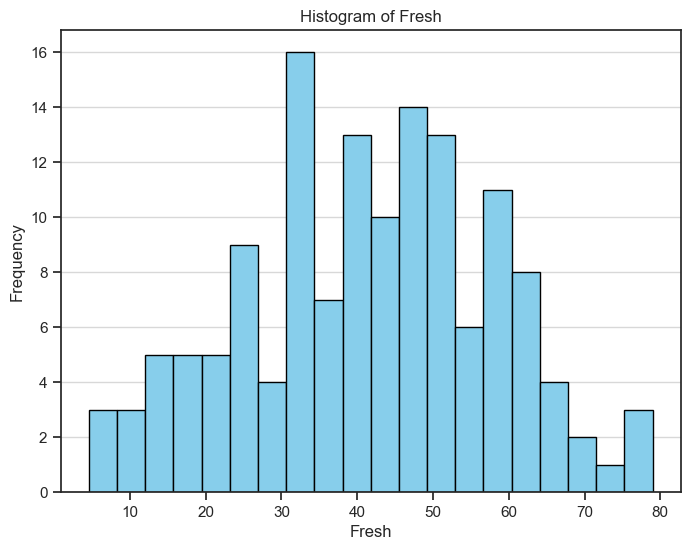

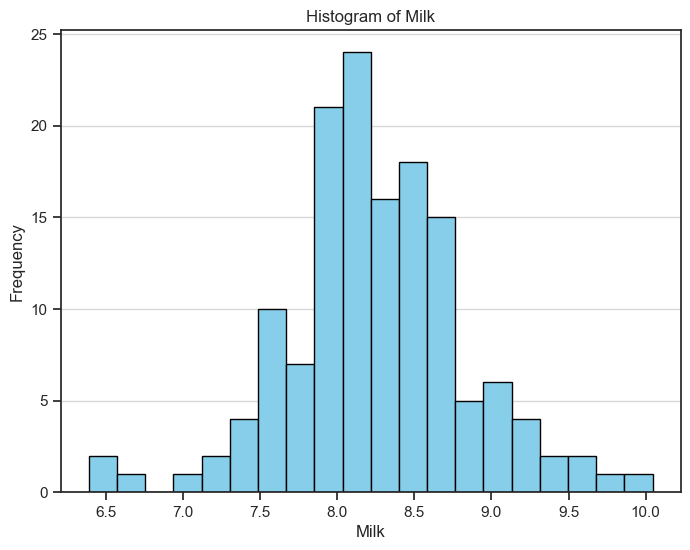

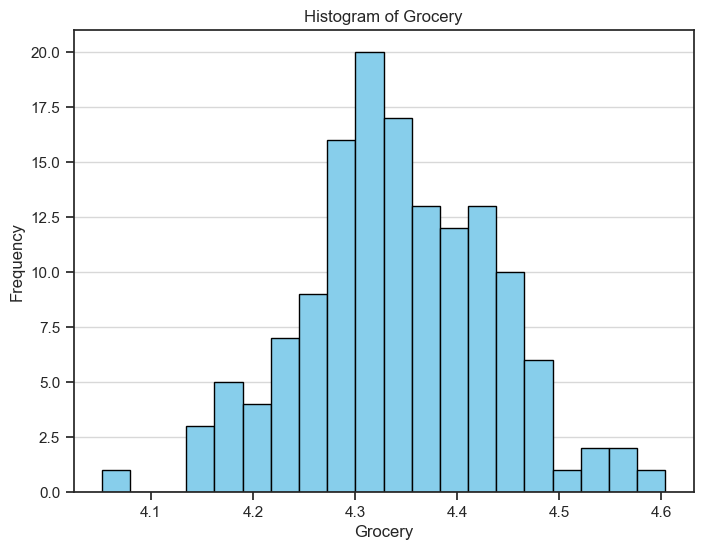

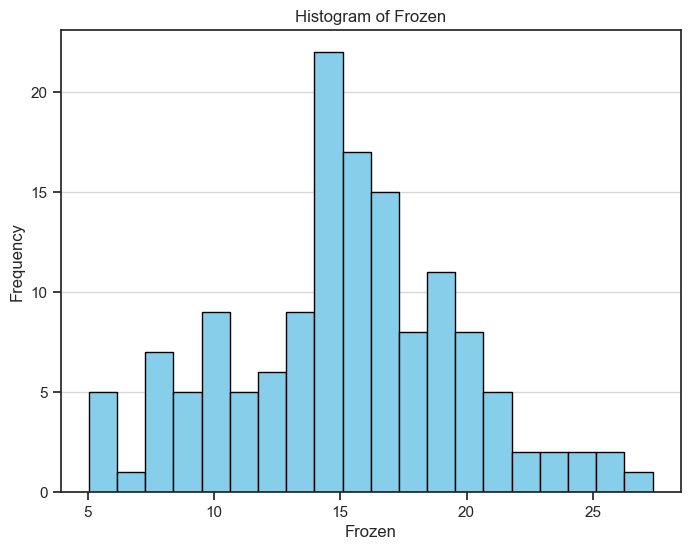

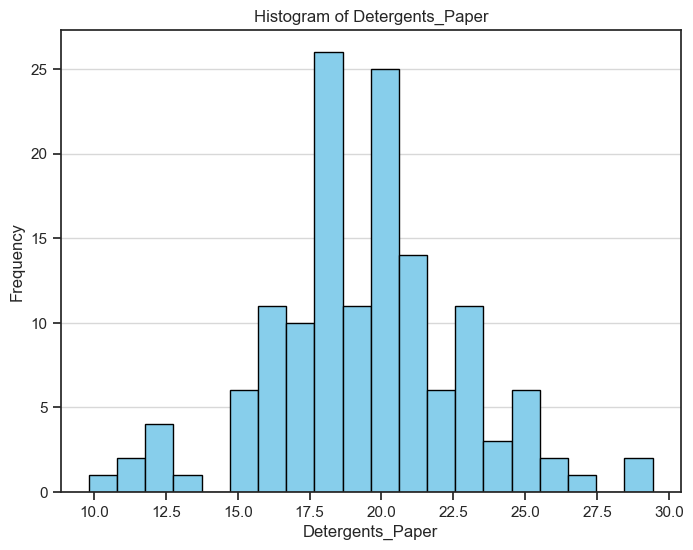

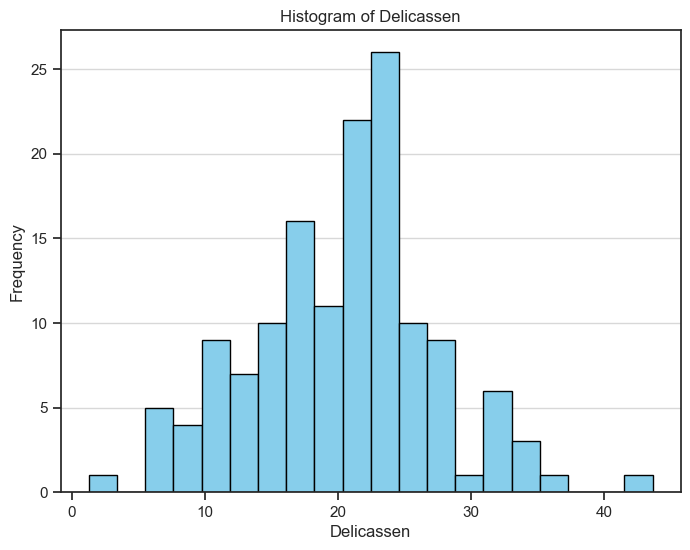

In [251]:
plot_histograms(df_channel_2, num_col)

C:\Users\dychi\anaconda3\envs\lhl_base\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


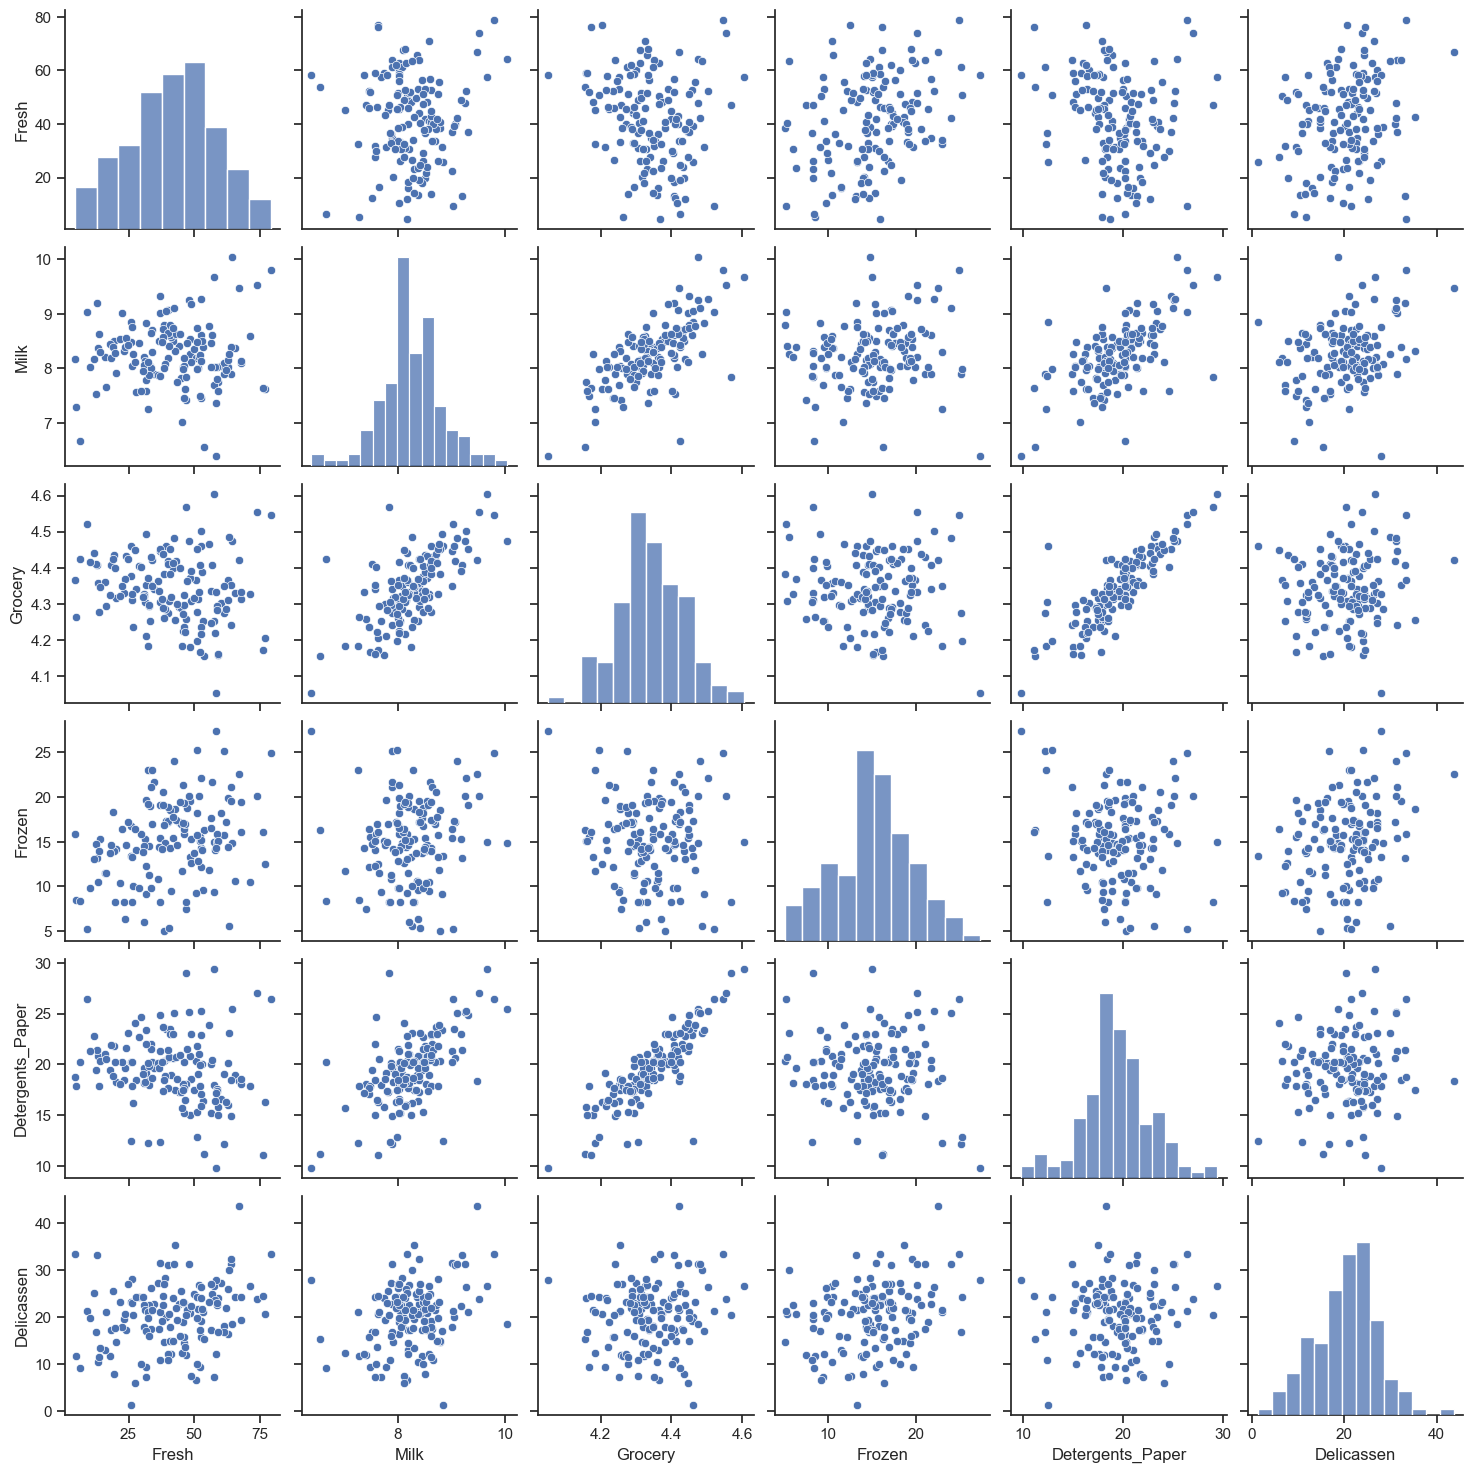

In [250]:
# Plot scatterplots for all combinations
sns.set(style="ticks")
sns.pairplot(df_channel_2[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.show()

# Simple Feature Engineering 


In [260]:
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

In [261]:
categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create ratio columns for each spending category
for category in categories:
    ratio_column_name = f'{category}_Ratio'
    df[ratio_column_name] = df[category] / df['Total_Spend']

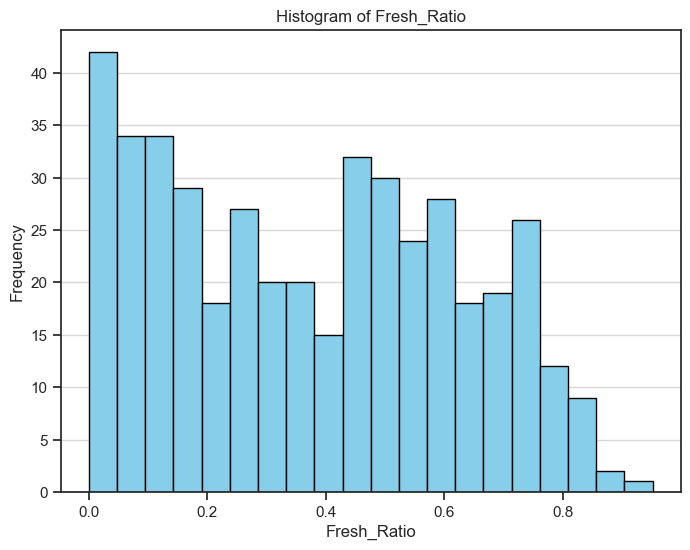

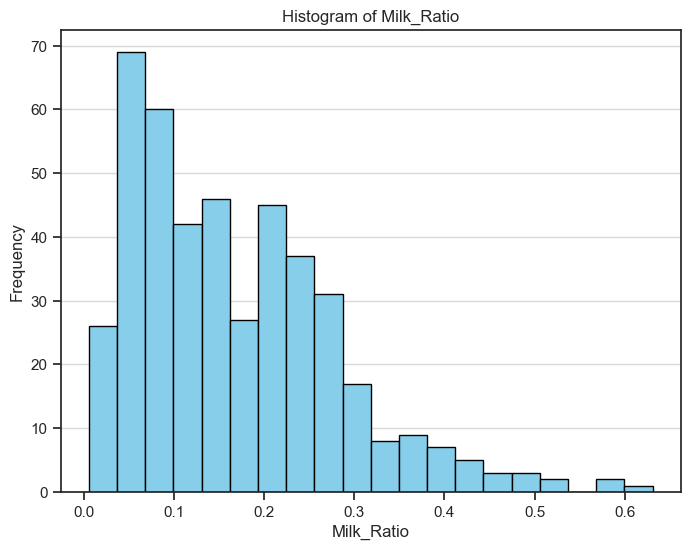

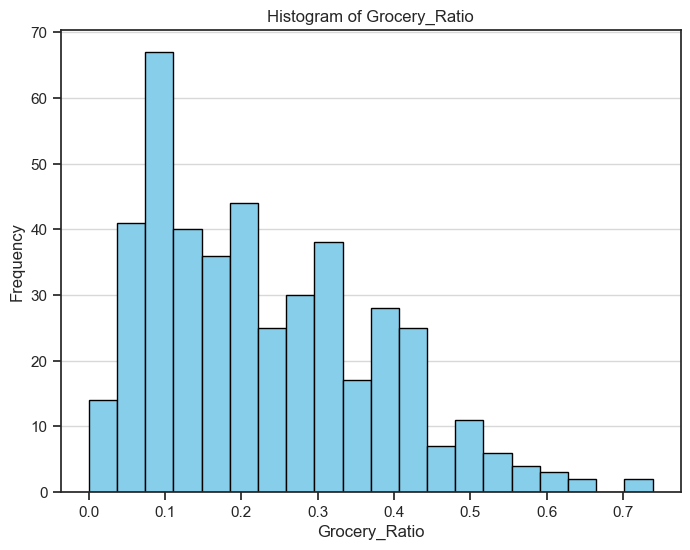

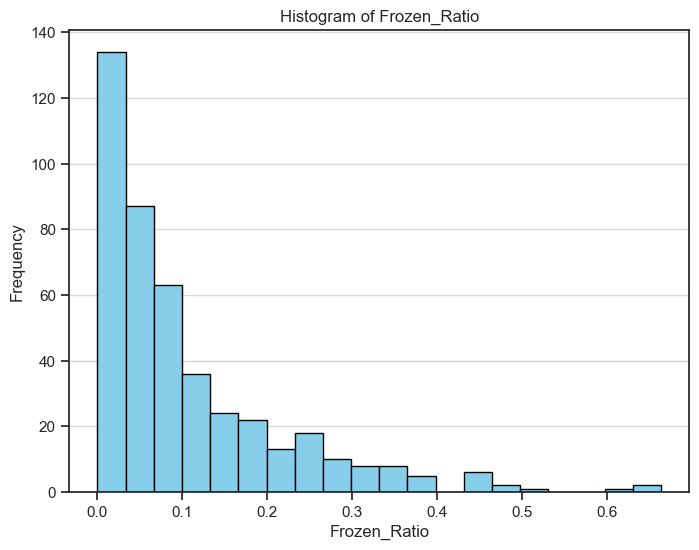

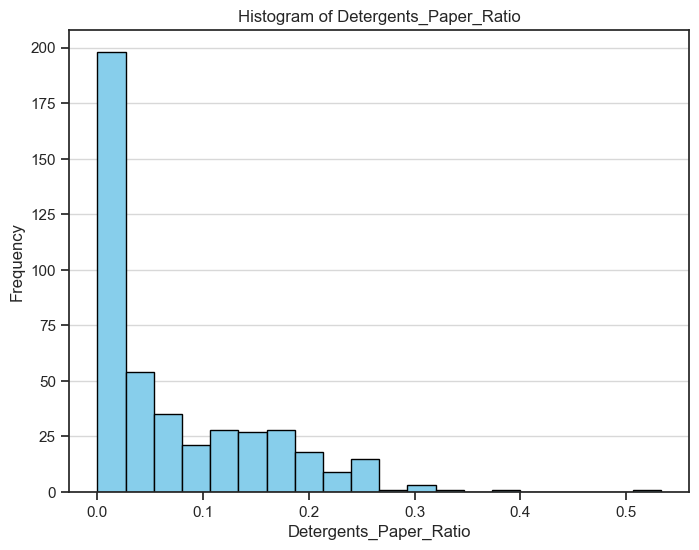

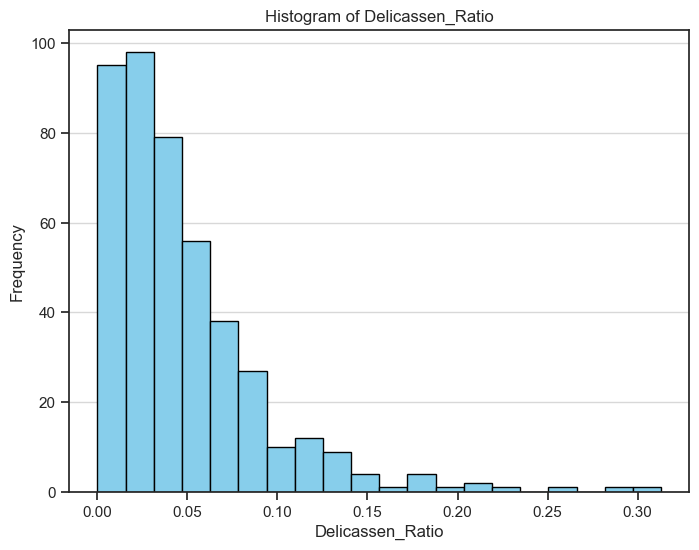

In [263]:
ratio_columns = ['Fresh_Ratio', 'Milk_Ratio', 'Grocery_Ratio', 'Frozen_Ratio', 'Detergents_Paper_Ratio', 'Delicassen_Ratio']

# Plot histograms for each ratio column
for ratio_column in ratio_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[ratio_column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {ratio_column}')
    plt.xlabel(ratio_column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()